# Introduction
---


In this notebook, we will be taking a look at the data we have prepared and cleaned for Forecasting Power use. We will be attempting to draw insights from the EDA to direct our feature engineering, feature selection and modelling in the next notebooks.

# Table of Contents
---
1. [Libraries](#loading-libraries)
2. [Data Set Loading](#loading-the-cleaned-and-combined-power-and-weather-dataset)
3. [EDA](#eda)
    - [Feature Interpretation and Distribution Summary](#featureinterpretationanddistributionsummary])
    - [Correlation Matrix](#correlation-matrix)
4. [Next Steps: Pre-Processing](#next-steps:-pre-processing)



# Loading Libraries
---

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


# Data Set Loading <a class="anchor" id="loading the cleaned-and combined power and weather dataset"></a>
---
 Loading the cleaned-and combined power and weather dataset

In [ ]:
file_path = r'C:\Users\karni\OneDrive\Bootcamp\Projects\Capstone\Brainstation Capstone Project\Appliance Energy Usage\data\power_weather.csv'
power_df_clean = pd.read_csv(file_path, parse_dates=['DateTime'], index_col='DateTime')
power_df_clean.head()

In [ ]:
# Making sure the data is loaded correctly by checking the end date
power_df_clean.tail()

Global_active_power  Global_reactive_power  Voltage  \
DateTime                                                                   
2010-11-26 20:58:00                0.946                    0.0   240.43   
2010-11-26 20:59:00                0.944                    0.0   240.00   
2010-11-26 21:00:00                0.938                    0.0   239.82   
2010-11-26 21:01:00                0.934                    0.0   239.70   
2010-11-26 21:02:00                0.932                    0.0   239.55   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
DateTime                                                                
2010-11-26 20:58:00               4.0             0.0             0.0   
2010-11-26 20:59:00               4.0             0.0             0.0   
2010-11-26 21:00:00               3.8             0.0             0.0   
2010-11-26 21:01:00               3.8             0.0             0.0   
2010-11-26 21:02:00               3.8             0.0             0.0   

                     Sub_metering_3  temperature_2m  relative_humidity_2m  \
DateTime                                                                    
2010-11-26 20:58:00             0.0          -1.163                  90.6   
2010-11-26 20:59:00             0.0          -1.182                  90.8   
2010-11-26 21:00:00             0.0          -1.200                  91.0   
2010-11-26 21:01:00             0.0          -1.202                  91.0   
2010-11-26 21:02:00             0.0          -1.203                  91.0   

                     dew_point_2m  apparent_temperature  surface_pressure  \
DateTime                                                                    
2010-11-26 20:58:00        -2.523                -4.763           994.707   
2010-11-26 20:59:00        -2.512                -4.782           994.703   
2010-11-26 21:00:00        -2.500                -4.800           994.700   
2010-11-26 21:01:00        -2.502                -4.803           994.695   
2010-11-26 21:02:00        -2.503                -4.807           994.690   

                     cloudcover  windspeed_10m  windgusts_10m  \
DateTime                                                        
2010-11-26 20:58:00        37.4          7.480         12.950   
2010-11-26 20:59:00        37.7          7.490         12.975   
2010-11-26 21:00:00        38.0          7.500         13.000   
2010-11-26 21:01:00        38.6          7.508         13.000   
2010-11-26 21:02:00        39.2          7.517         13.000   

                     winddirection_10m  shortwave_radiation  direct_radiation  \
DateTime                                                                        
2010-11-26 20:58:00            215.267                  0.0               0.0   
2010-11-26 20:59:00            215.133                  0.0               0.0   
2010-11-26 21:00:00            215.000                  0.0               0.0   
2010-11-26 21:01:00            214.867                  0.0               0.0   
2010-11-26 21:02:00            214.733                  0.0               0.0   

                     diffuse_radiation  
DateTime                                
2010-11-26 20:58:00                0.0  
2010-11-26 20:59:00                0.0  
2010-11-26 21:00:00                0.0  
2010-11-26 21:01:00                0.0  
2010-11-26 21:02:00                0.0

In [ ]:
#Checking that data types are correctly loaded
power_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   temperature_2m         float64
 8   relative_humidity_2m   float64
 9   dew_point_2m           float64
 10  apparent_temperature   float64
 11  surface_pressure       float64
 12  cloudcover             float64
 13  windspeed_10m          float64
 14  windgusts_10m          float64
 15  winddirection_10m      float64
 16  shortwave_radiation    float64
 17  direct_radiation       float64
 18  diffuse_radiation      float64
dtypes: float64(19)
memory usage: 312.7 MB


There are 19 numerical columns, as we had saved those from the previous Notebook

# EDA <a class="anchor" id="eda"></a>
---

In [9]:
#Lets take a look at the statistical properties of the numerical columns

power_df_clean.describe().T

count         mean         std      min      25%  \
Global_active_power    2049280.0     1.091615    1.057294    0.076    0.308   
Global_reactive_power  2049280.0     0.123714    0.112722    0.000    0.048   
Voltage                2049280.0   240.839858    3.239987  223.200  238.990   
Global_intensity       2049280.0     4.627759    4.444396    0.200    1.400   
Sub_metering_1         2049280.0     1.121923    6.153031    0.000    0.000   
Sub_metering_2         2049280.0     1.298520    5.822026    0.000    0.000   
Sub_metering_3         2049280.0     6.458447    8.437154    0.000    0.000   
temperature_2m         2049280.0    11.197882    6.947969  -10.400    6.197   
relative_humidity_2m   2049280.0    76.620090   15.182177   23.000   66.167   
dew_point_2m           2049280.0     6.848154    5.536301  -14.500    3.257   
apparent_temperature   2049280.0     8.746860    8.230887  -15.100    2.620   
surface_pressure       2049280.0  1005.039092    9.484706  959.200  999.732   
cloudcover             2049280.0    66.100333   36.390039    0.000   35.133   
windspeed_10m          2049280.0    12.902541    6.412553    0.000    8.080   
windgusts_10m          2049280.0    26.383534   12.987689    2.200   16.398   
winddirection_10m      2049280.0   188.177822  103.724861    1.000   88.750   
shortwave_radiation    2049280.0   134.258373  202.583607    0.000    0.000   
direct_radiation       2049280.0    76.762860  145.706026    0.000    0.000   
diffuse_radiation      2049280.0    57.495514   78.670665    0.000    0.000   

                            50%       75%       max  
Global_active_power       0.602     1.528    11.122  
Global_reactive_power     0.100     0.194     1.390  
Voltage                 241.010   242.890   254.150  
Global_intensity          2.600     6.400    48.400  
Sub_metering_1            0.000     0.000    88.000  
Sub_metering_2            0.000     1.000    80.000  
Sub_metering_3            1.000    17.000    31.000  
temperature_2m           11.258    16.250    34.800  
relative_humidity_2m     79.650    89.233   100.000  
dew_point_2m              7.323    10.957    21.300  
apparent_temperature      8.595    14.905    35.000  
surface_pressure       1005.637  1011.067  1031.700  
cloudcover               82.300    99.200   100.000  
windspeed_10m            11.695    16.592    51.700  
windgusts_10m            24.050    33.820    99.000  
winddirection_10m       210.067   267.050   360.000  
shortwave_radiation      11.067   213.450   908.000  
direct_radiation          0.667    81.533   779.000  
diffuse_radiation         8.200   100.867   417.000

In [12]:
list_features = list(power_df_clean.select_dtypes(include=['float64']).columns)
list_features 

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3',
 'temperature_2m',
 'relative_humidity_2m',
 'dew_point_2m',
 'apparent_temperature',
 'surface_pressure',
 'cloudcover',
 'windspeed_10m',
 'windgusts_10m',
 'winddirection_10m',
 'shortwave_radiation',
 'direct_radiation',
 'diffuse_radiation']

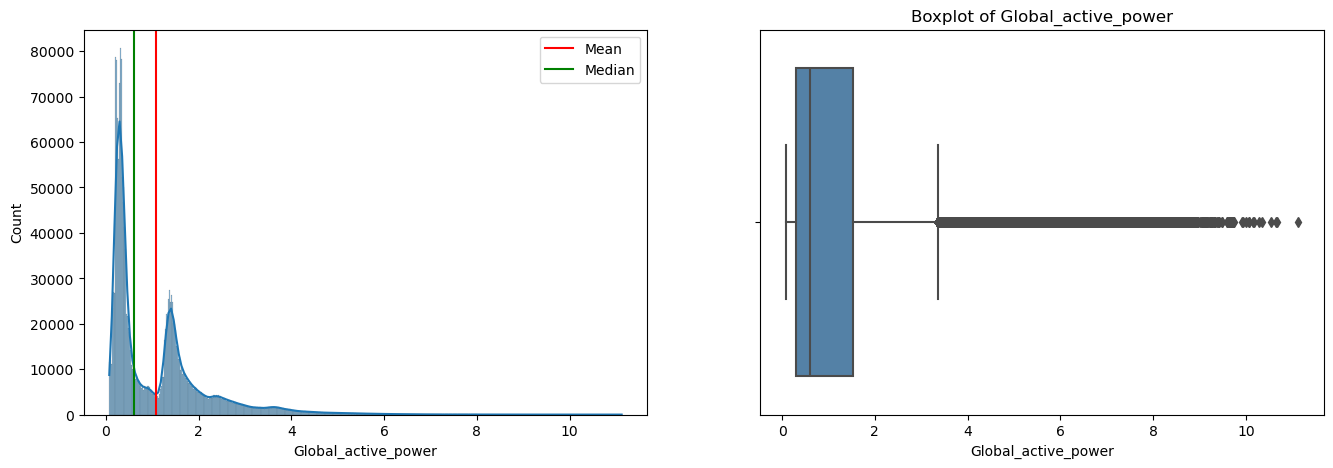

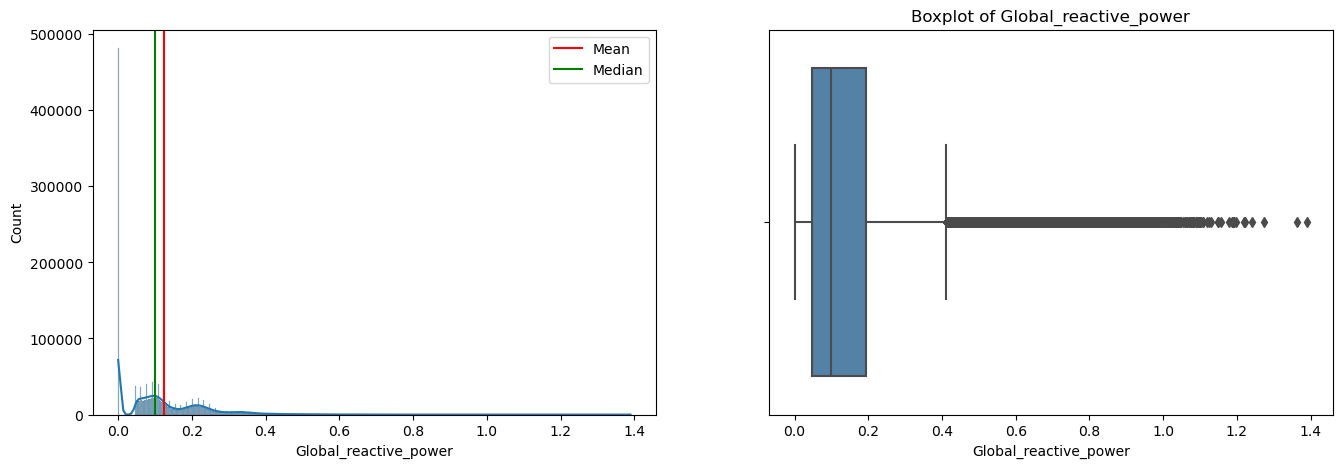

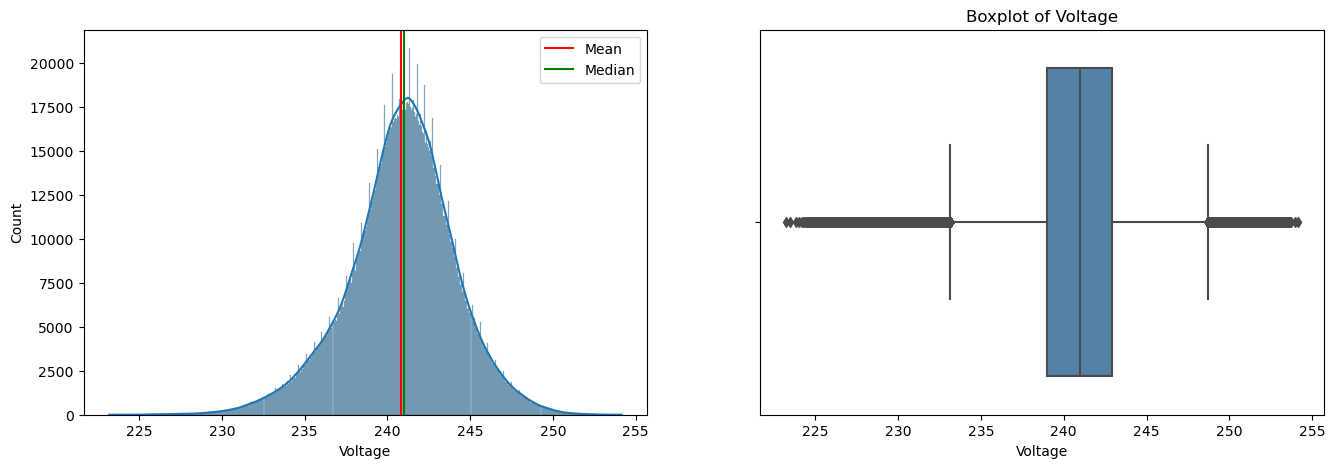

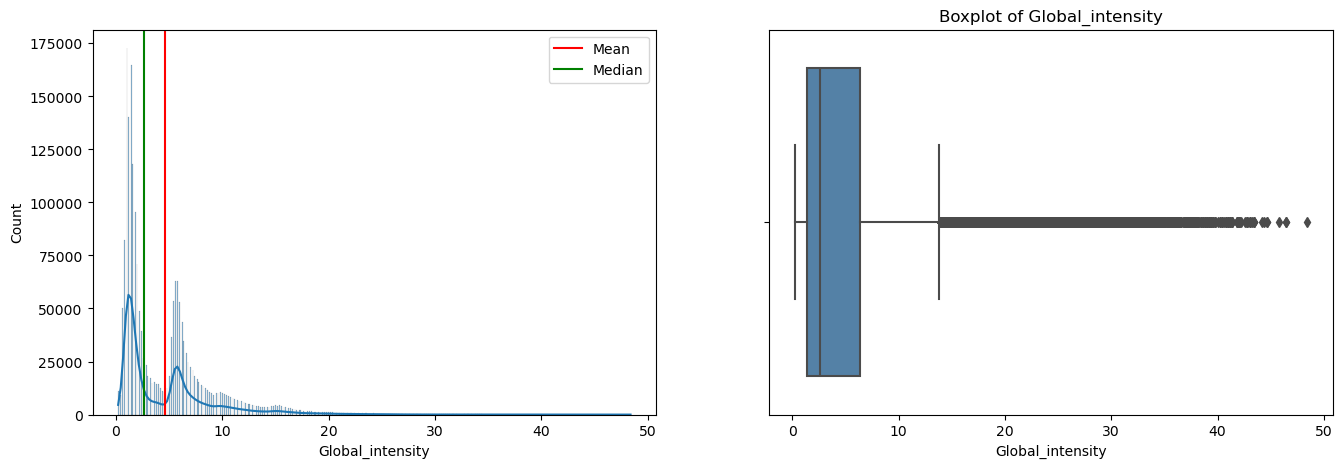

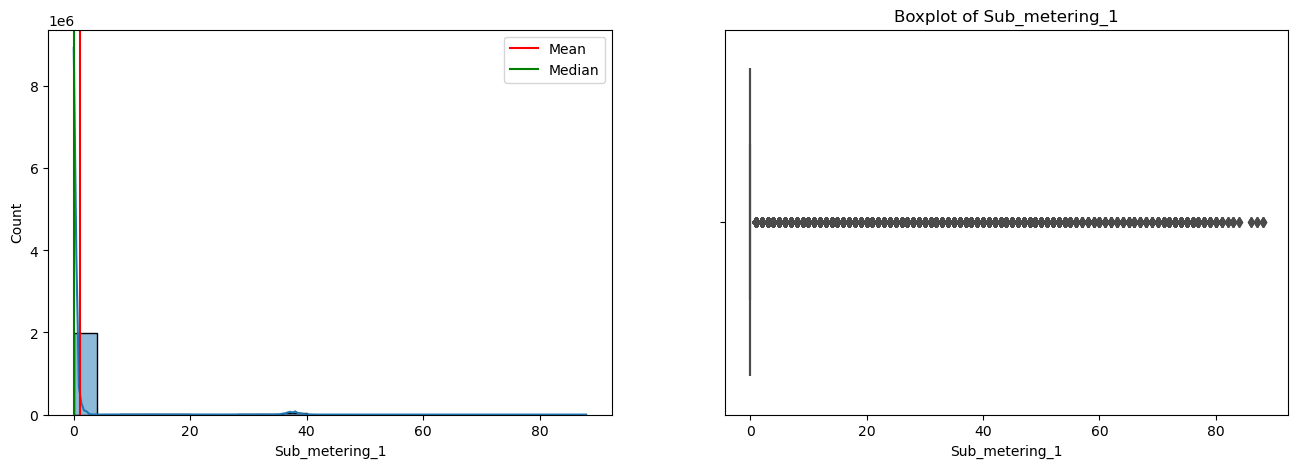

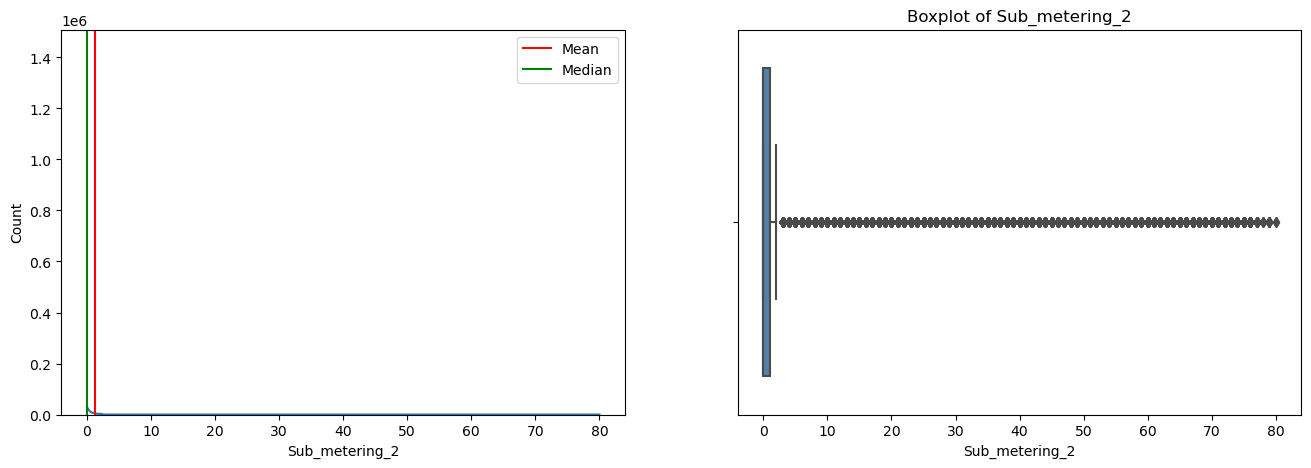

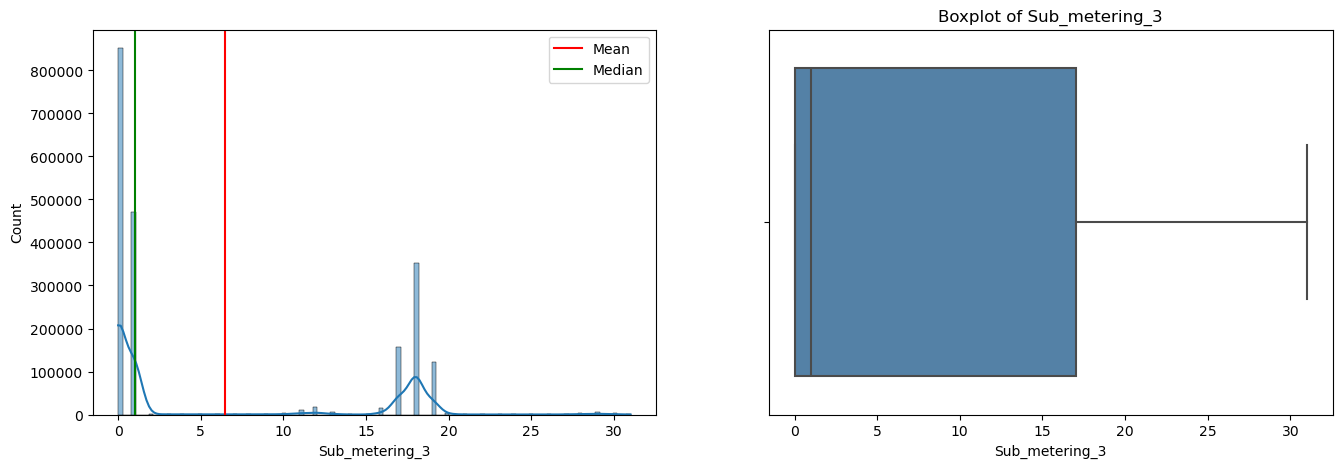

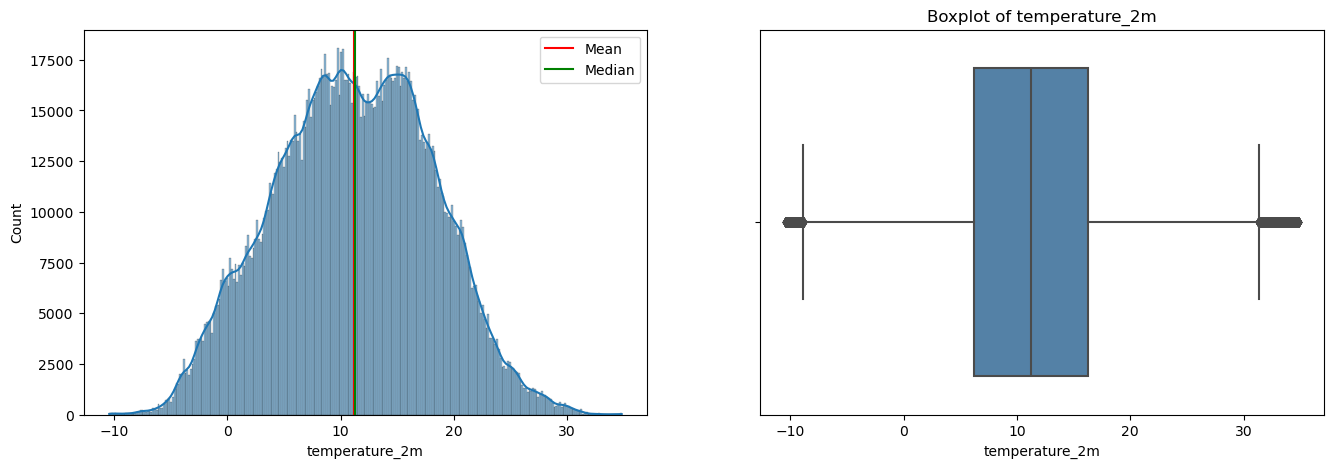

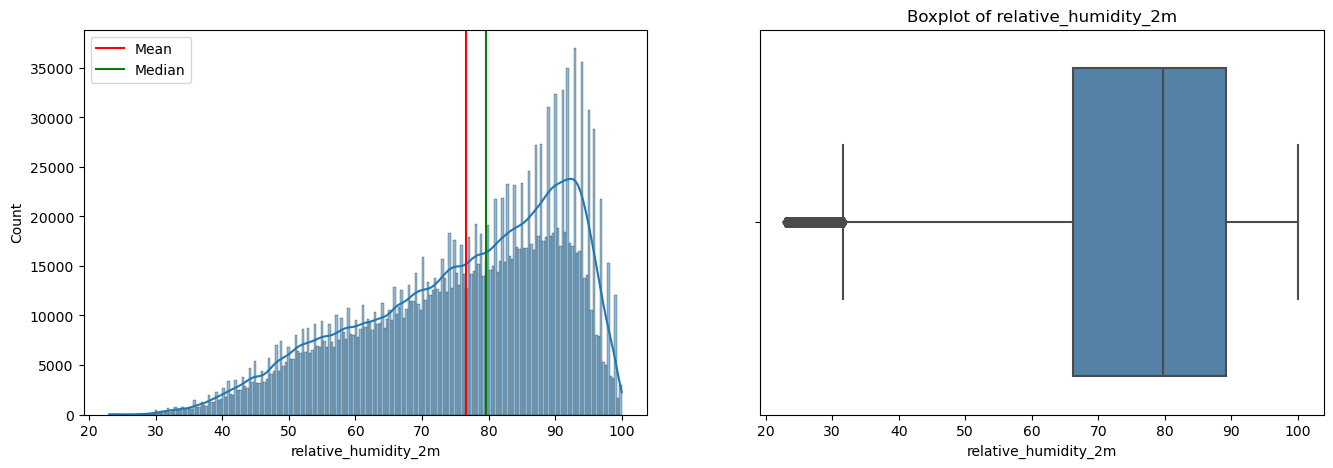

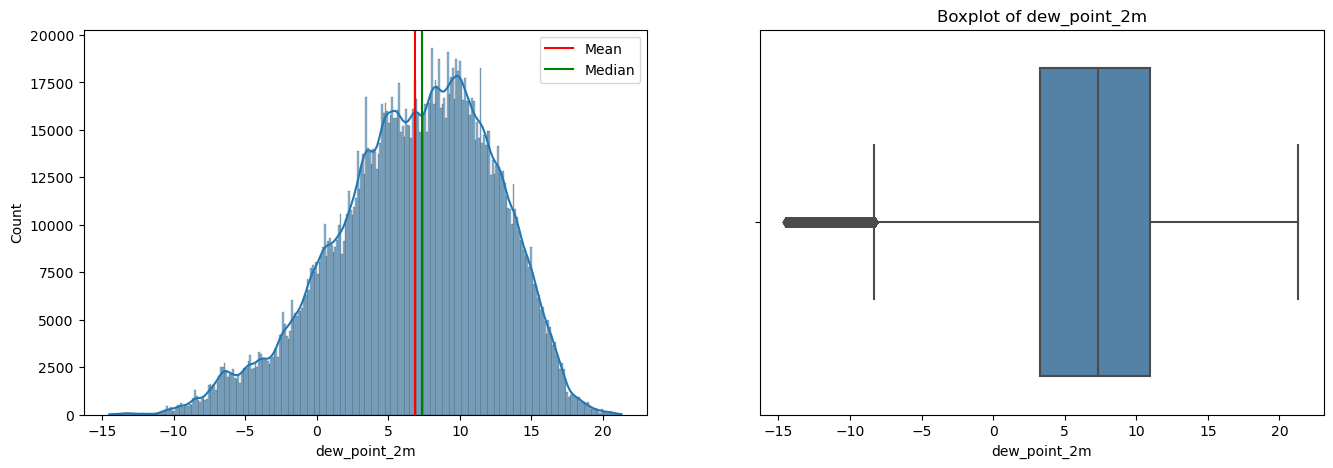

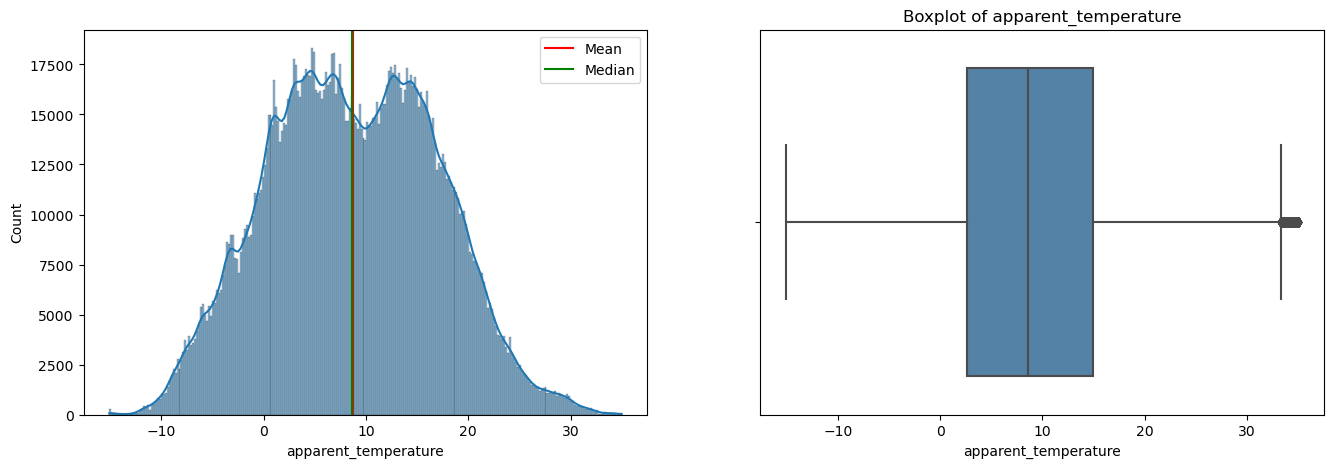

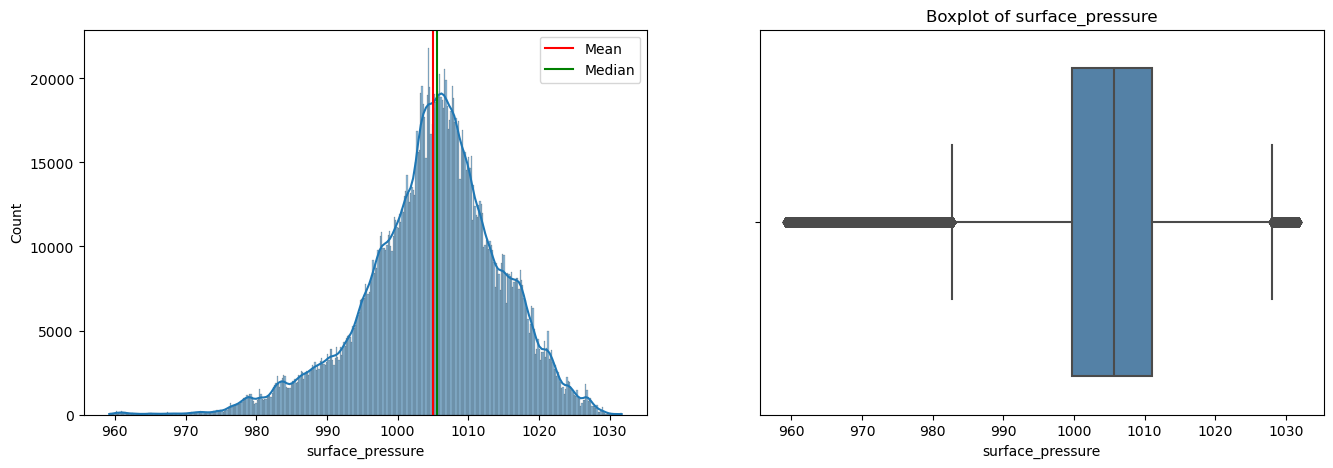

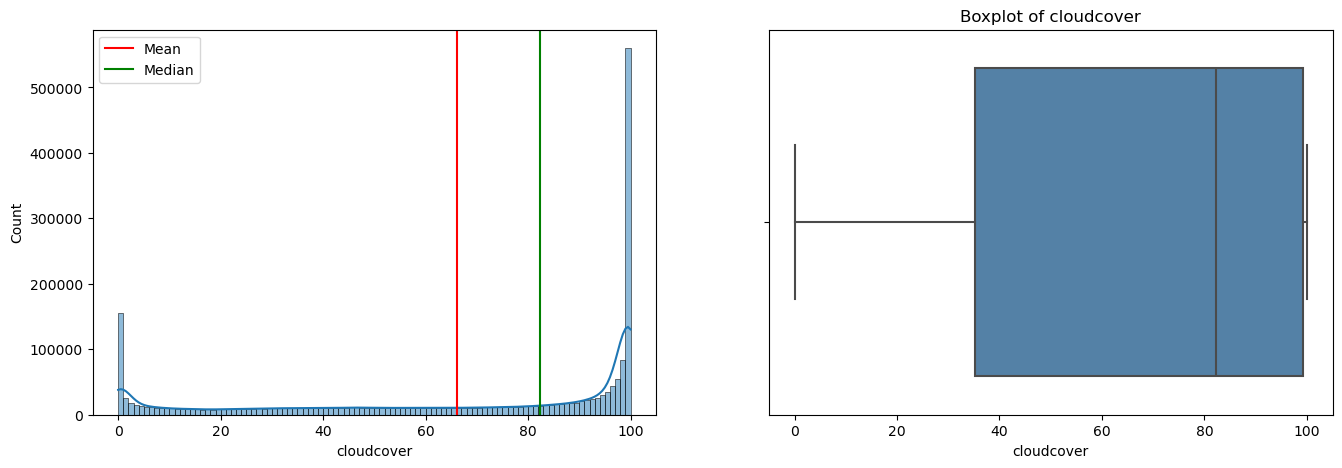

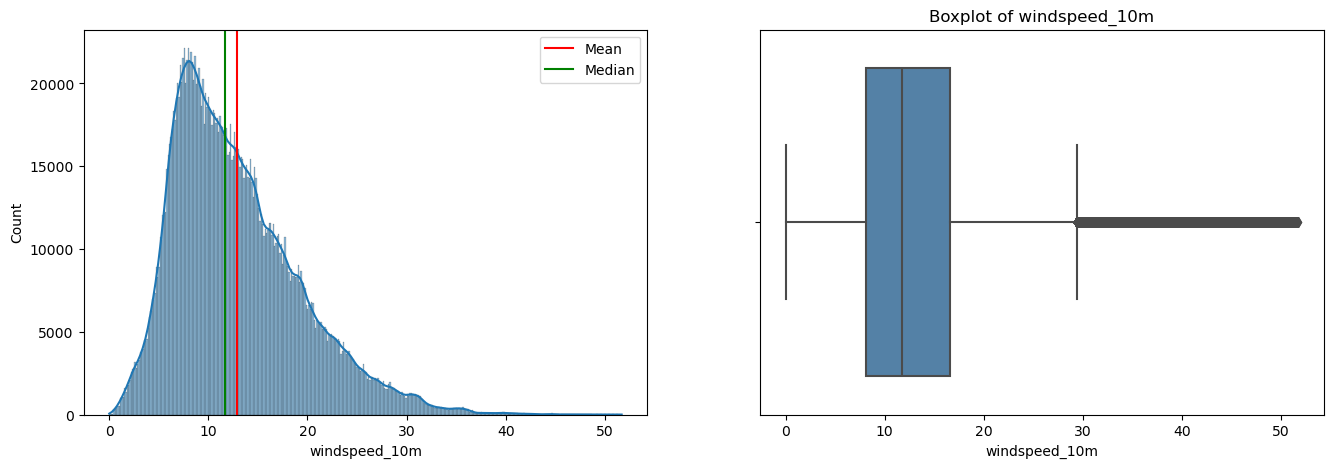

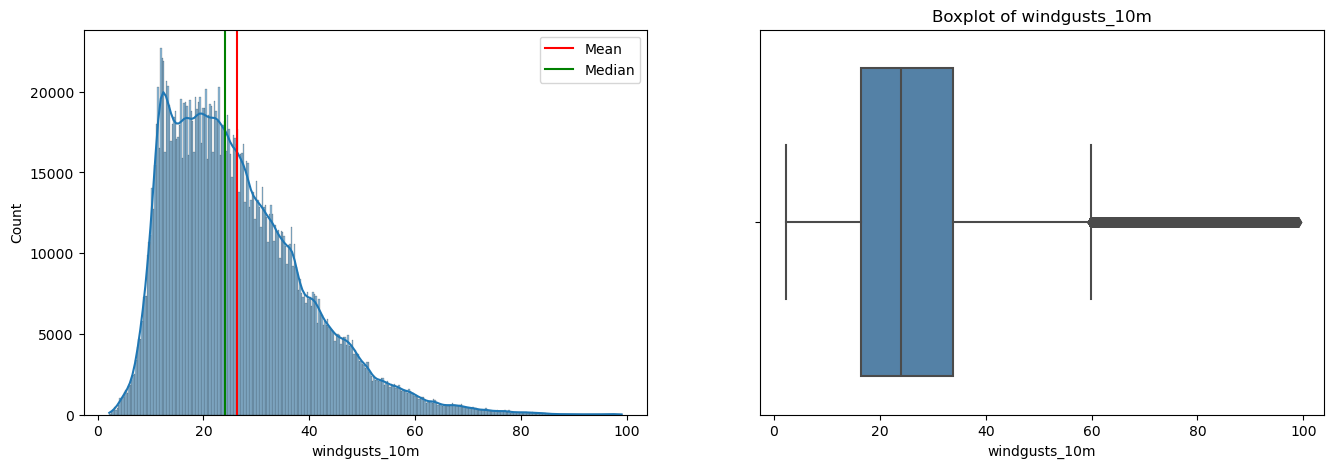

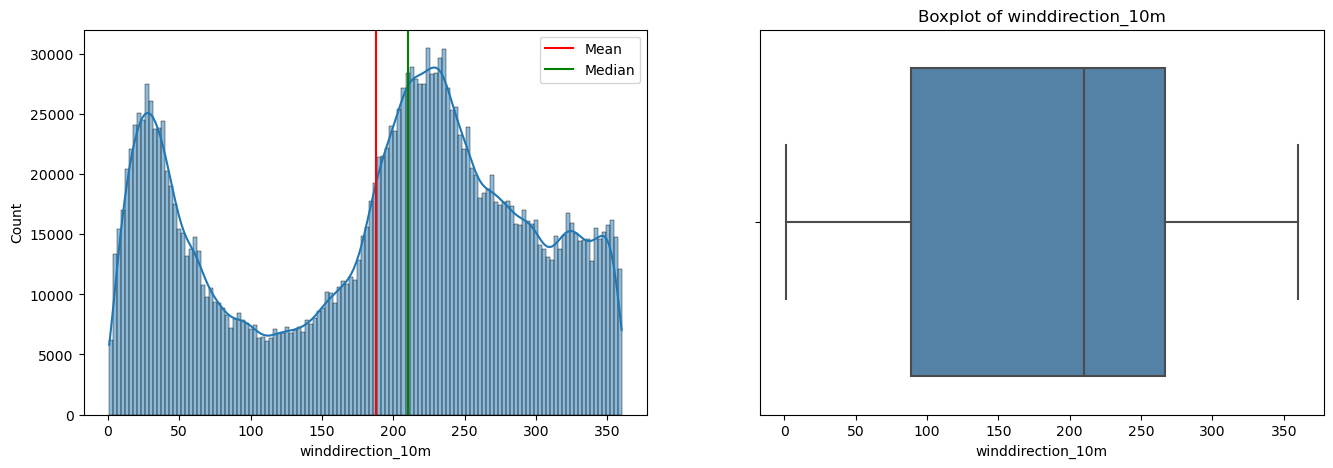

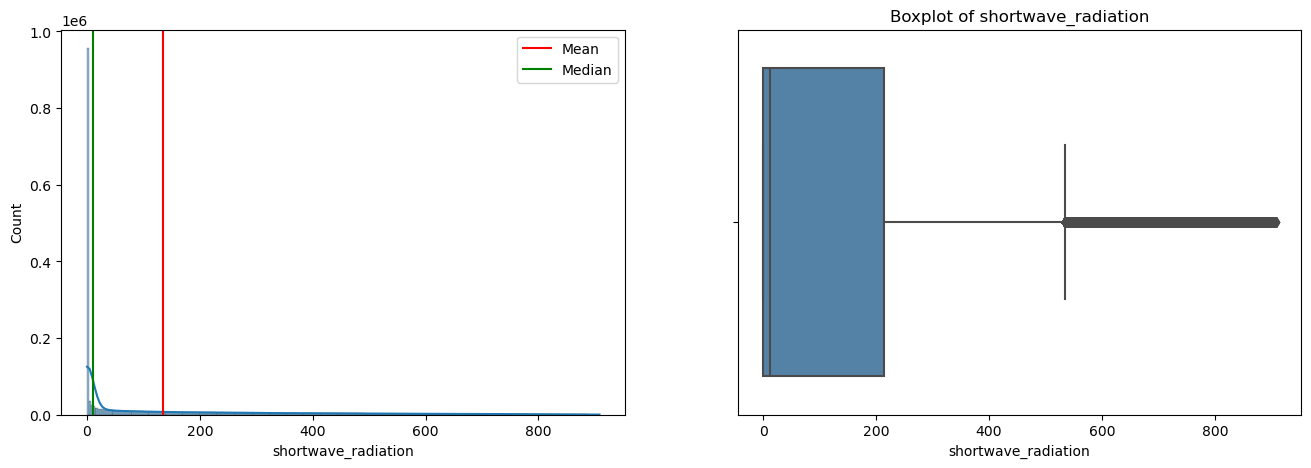

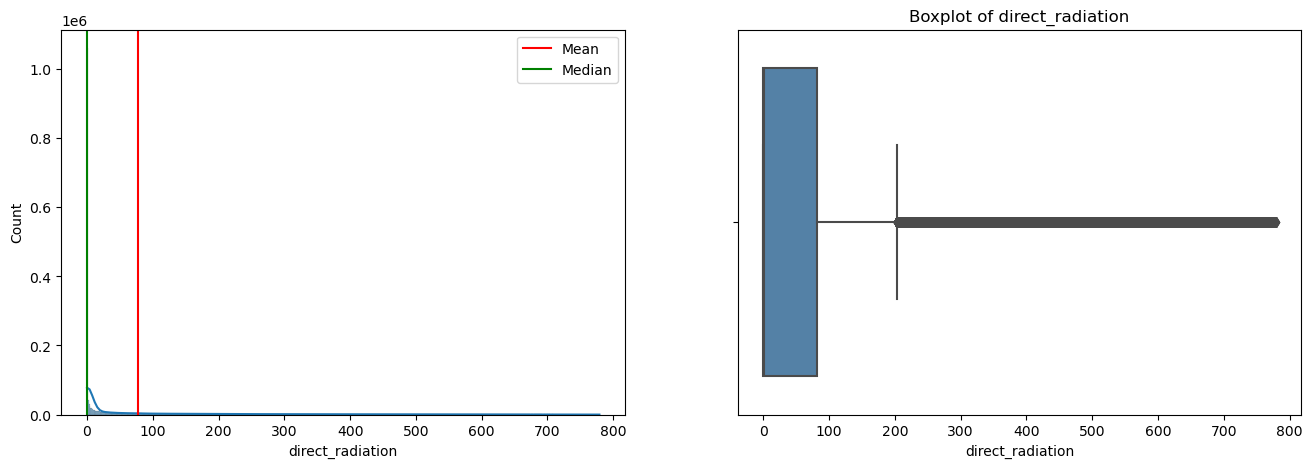

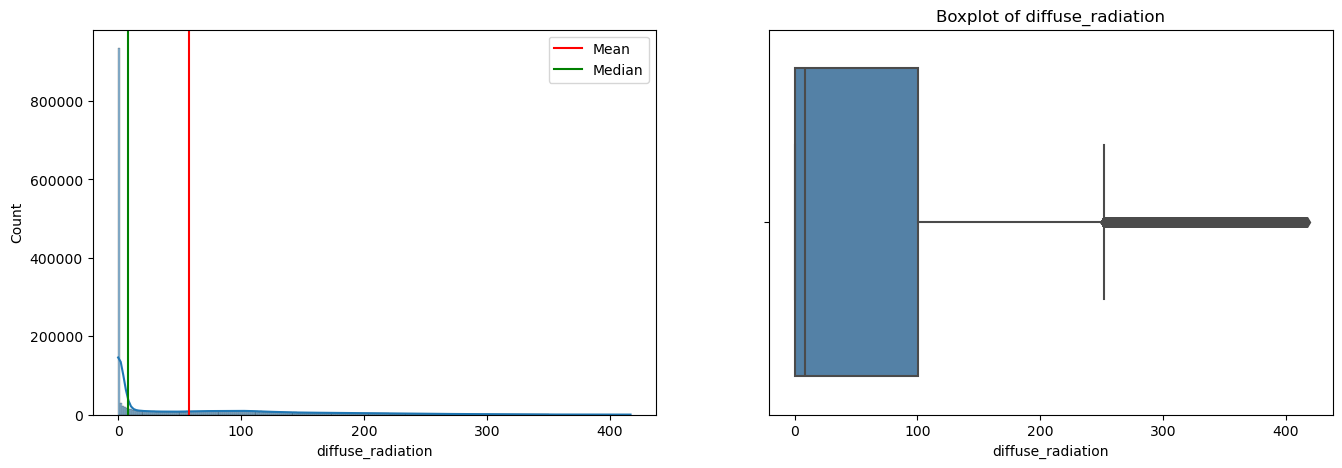

In [17]:
# Loop through column names in list
for col in list_features:
# Save column values, mean, and median to variables
    var = power_df_clean[col]
    var_mean = var.mean()
    var_median = var.median()
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
 
    # Plot a histogram of song tempo, with lines marking mean and median
    plt.subplot(1, 2, 1)
    sns.histplot(var, kde=True)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()
    # Plot the boxplot. We can use the seaborn boxplot code for this.
    plt.subplot(1, 2, 2)
    sns.boxplot(x=power_df_clean[col], color="steelblue")
    plt.title(f"Boxplot of {col}")
    
    plt.show()

## 📊 Feature Interpretation and Distribution Summary

| Feature Name             | Description                                                  | Typical Distribution       | Interpretation / Comments                                                                 |
|--------------------------|--------------------------------------------------------------|-----------------------------|-------------------------------------------------------------------------------------------|
| **Global_active_power**  | Total active power consumed (kW)                             | Right-skewed                | Most values 0.2–2.5 kW, peaks >5 kW indicate high usage. Spikes near 0 may be anomalies.  |
| **Global_reactive_power**| Reactive power (kW)                                          | Right-skewed, low values    | Mostly <0.5 kW, peaks during inductive load use. Useful for power quality analysis.       |
| **Voltage**              | Average voltage (V)                                          | Normal or slightly bimodal  | Centered around 235–245V. Fluctuations indicate grid stability or appliance startup.      |
| **Global_intensity**     | Current intensity (A)                                        | Similar to active power     | Correlates with Global_active_power. Peaks indicate high appliance use.                   |
| **Sub_metering_1**       | Kitchen appliances energy (Wh)                               | Zero-inflated               | Mostly 0, peaks during cooking times (e.g., lunch/dinner). Seasonal usage patterns.       |
| **Sub_metering_2**       | Laundry appliances energy (Wh)                               | Zero-inflated, sparse       | Peaks once or twice a day. Strong weekly trends (e.g., weekend laundry).                  |
| **Sub_metering_3**       | Water heater & AC energy (Wh)                                | Less sparse, low skew       | More frequent use, indicates baseline consumption. Seasonal patterns may appear.          |
| **Weather Features**    | Connected through API          | Variable                     | The distrubitions are vary variable, might need to consider to drop some features if necessary to help in our modelling                |


Lets plot all our taret variable which is the Global Active Power against all other features in our data set

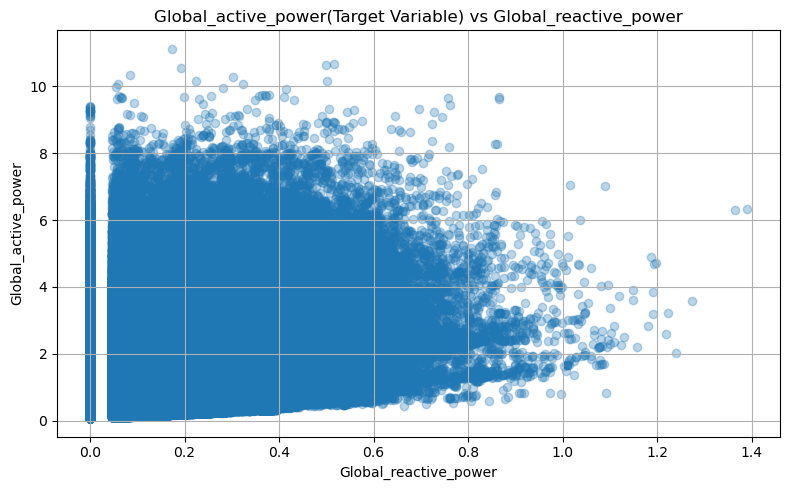

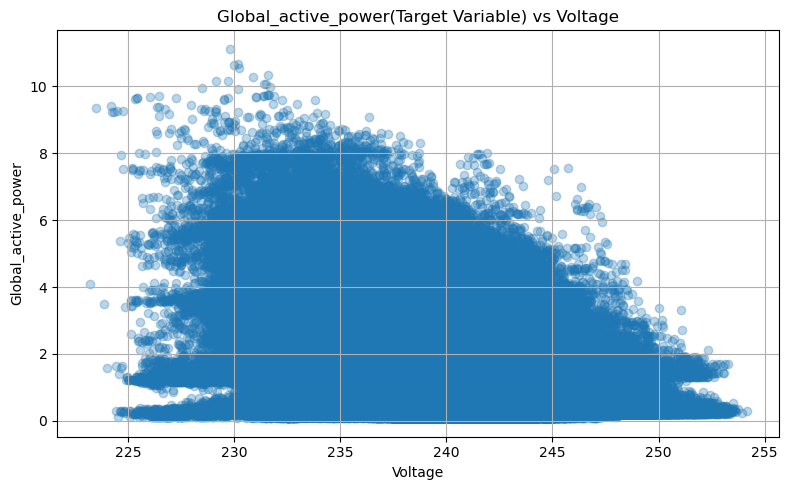

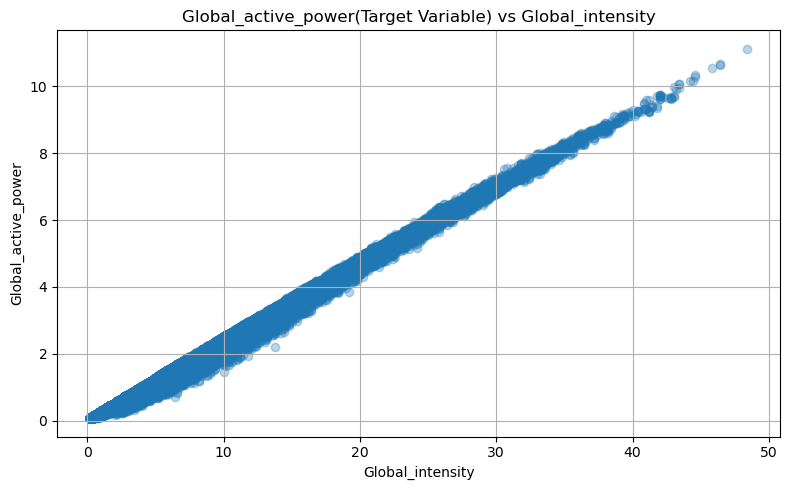

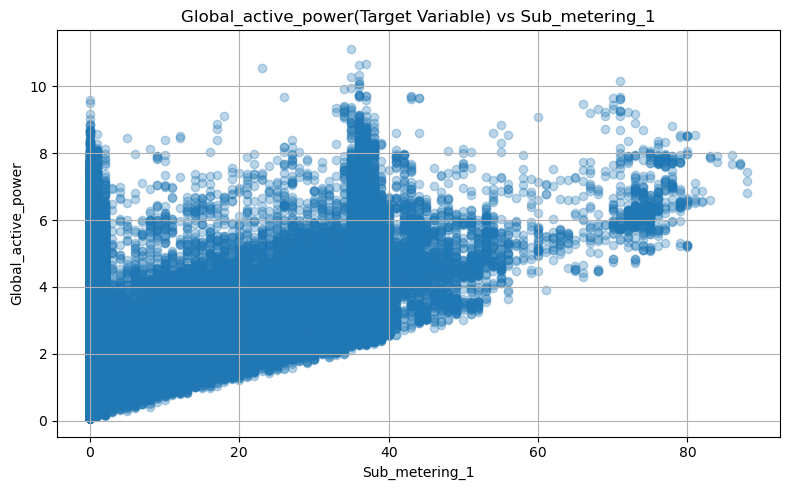

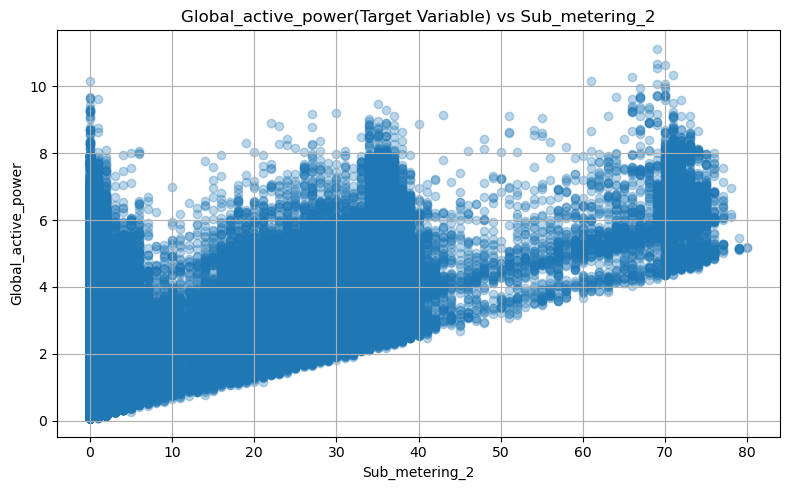

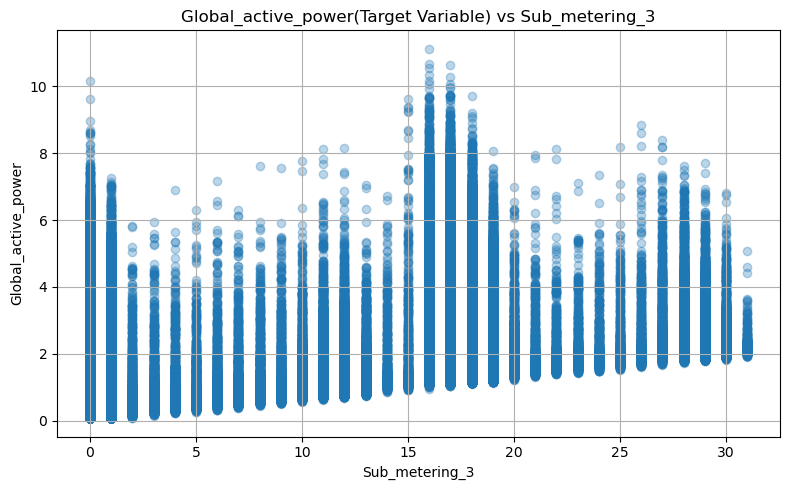

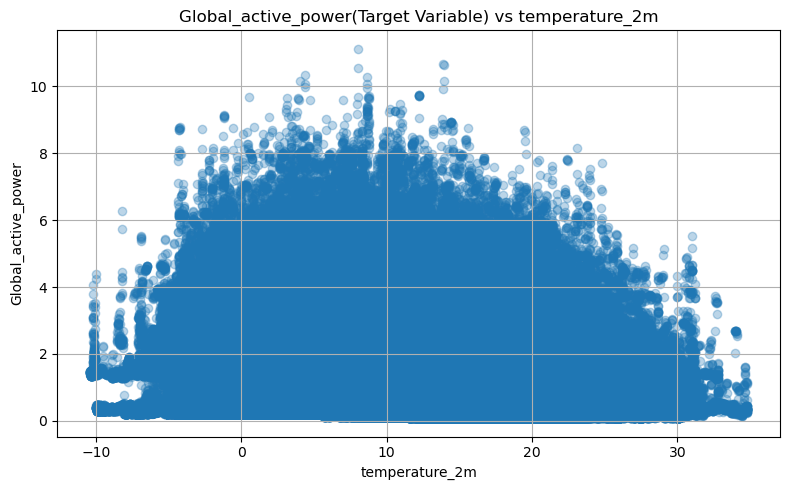

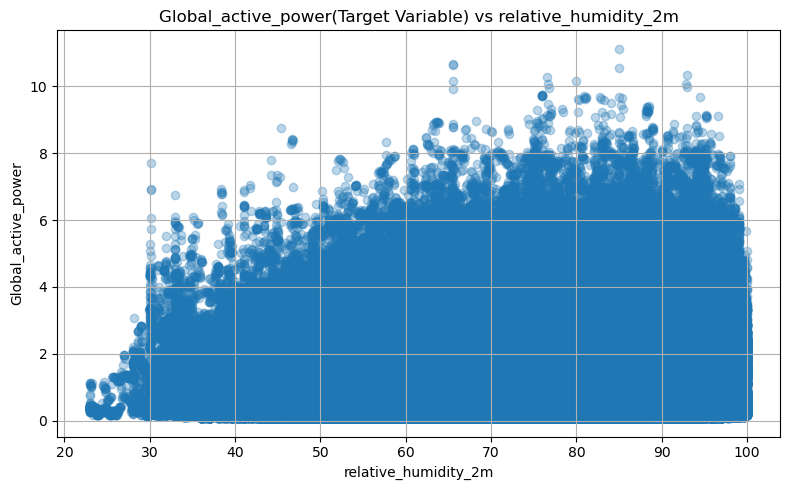

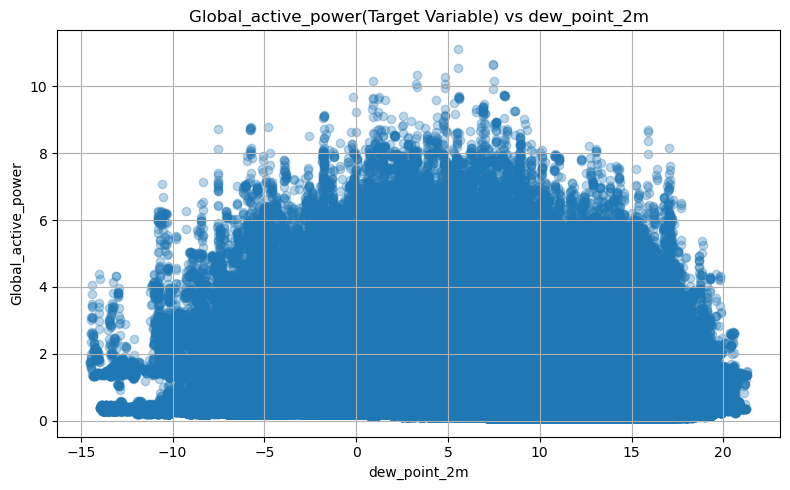

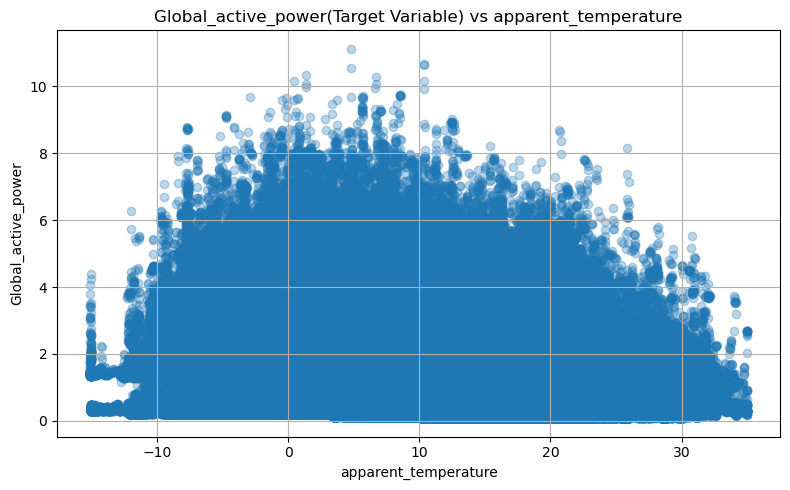

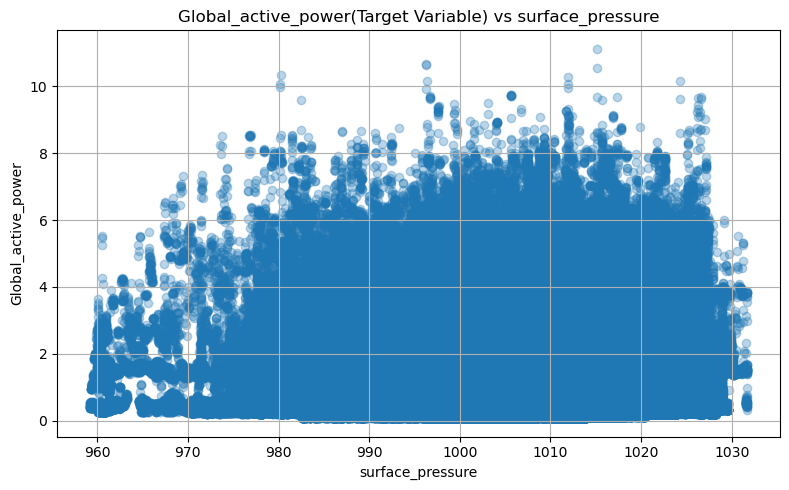

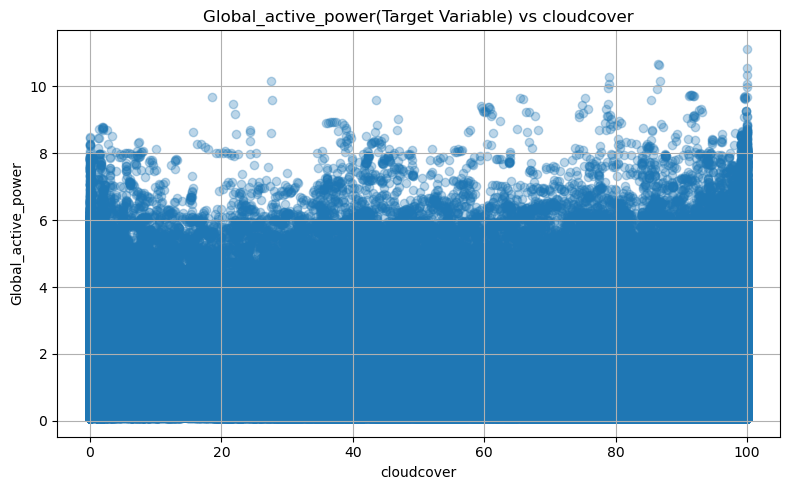

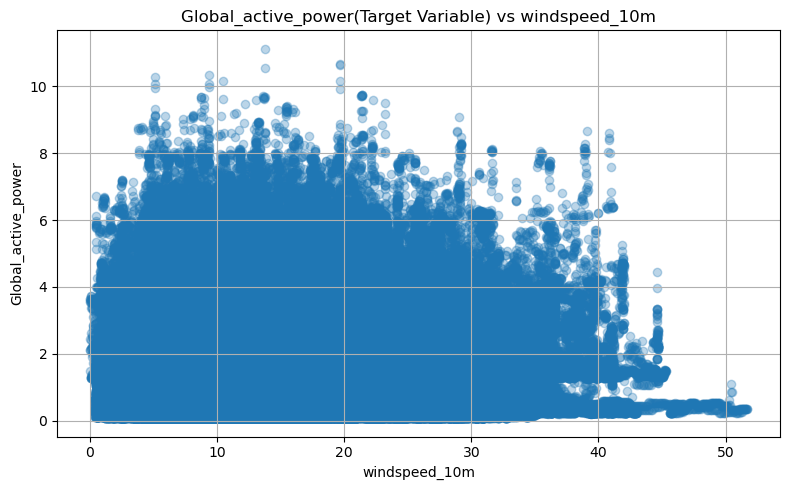

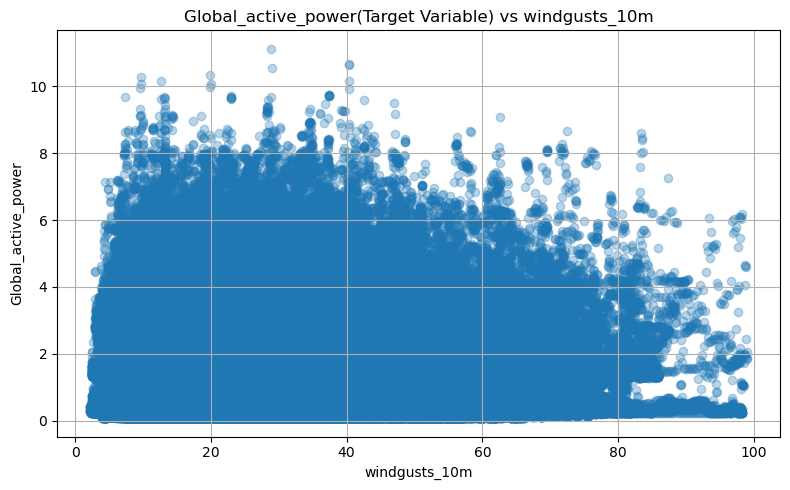

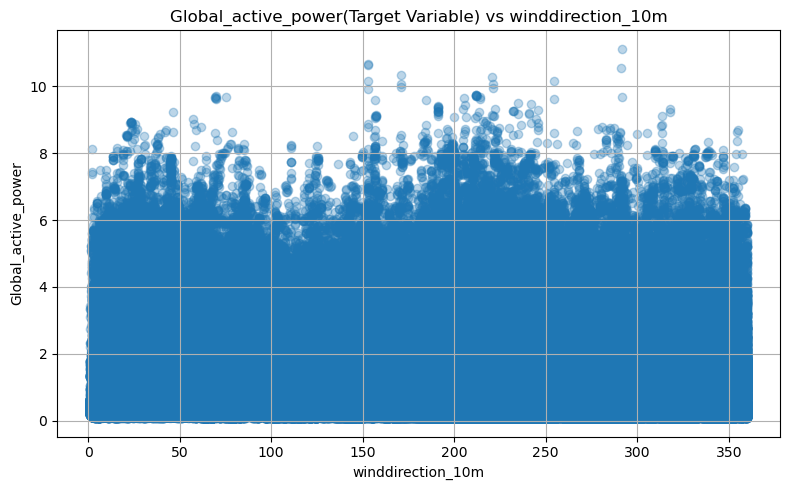

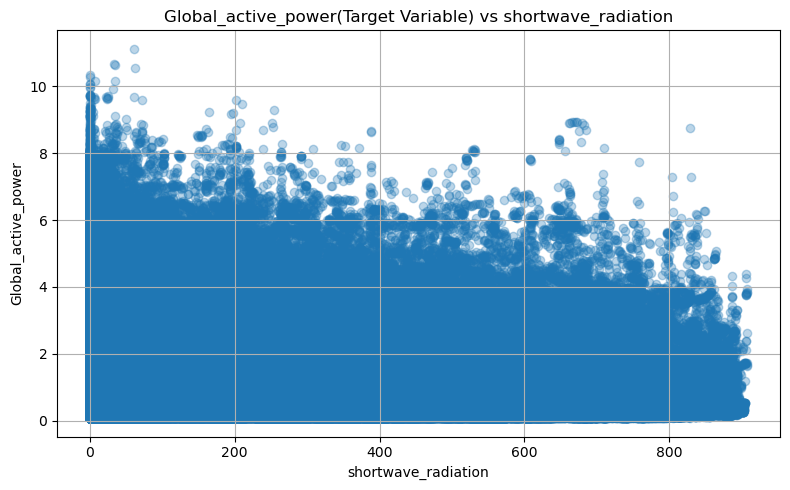

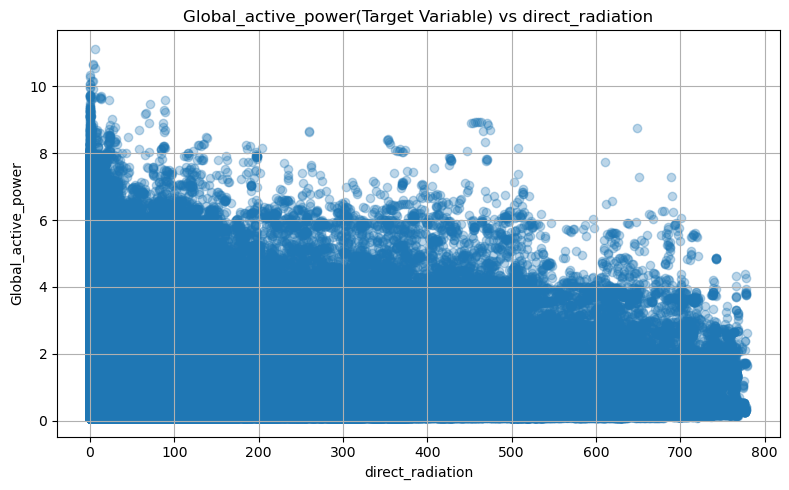

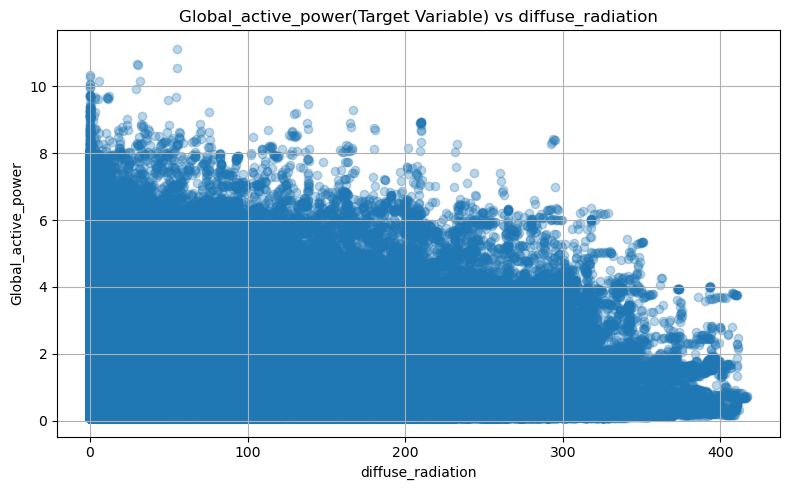

In [ ]:
# Scatter plots of all variables vs Global_active_power
for col in power_df_clean.columns:
    if col != 'Global_active_power':
        plt.figure(figsize=(8, 5))
        plt.scatter(power_df_clean[col], power_df_clean['Global_active_power'], alpha=0.3)
        plt.xlabel(col)
        plt.ylabel('Global_active_power')
        plt.title(f'Global_active_power vs {col}')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

Based on the graphs above, we can see that there are some variables that have a strong correlation with `Global_active_power`, such as **Intensity**. The scatter plot show that `Global_active_power` has a positive correlation with **Intensity**,

Other variables like **Sub_metering_1,Sub_metering_2, and Sub_metering_3** also show some correlation but are not as strong.

The weather API fearures doesnt seem to show much influence on our target variable Global_active_power

 Next we can visulalize and intrepret this much better with a correlation matrix 



## Correlation Matrix


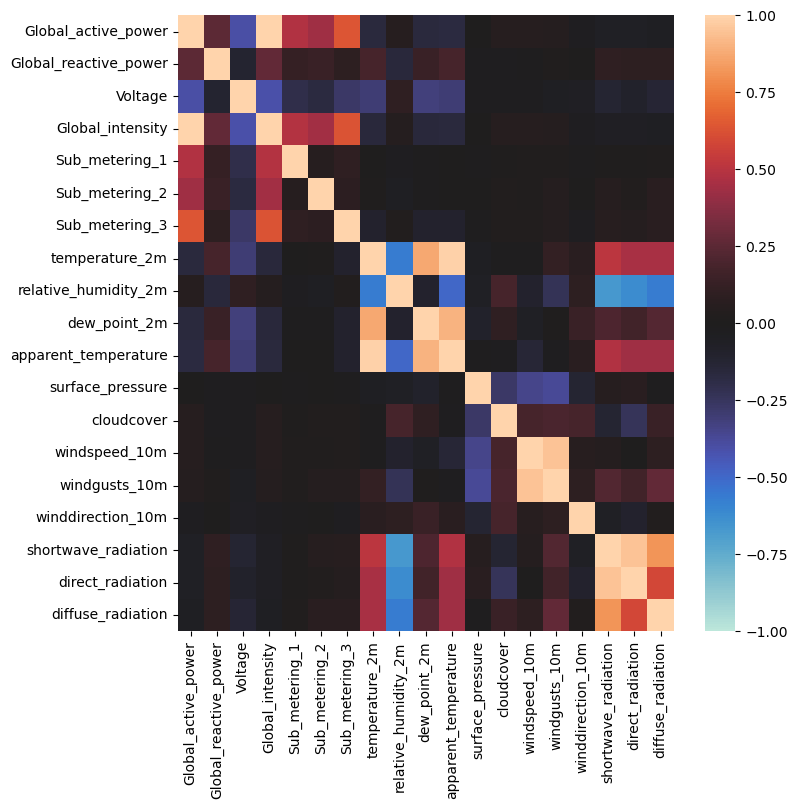

In [24]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,8))
#sns.heatmap(df.corr(numeric_only=True), annot=True, center=0, vmin=-1, vmax=1,fmt='.2f',annot_kws={'size': 8})
sns.heatmap(power_df_clean.corr(numeric_only=True).round(2), annot=False, fmt='g', center=0, vmin=-1, vmax=1, annot_kws={'size': 10})
plt.show()

<Axes: >

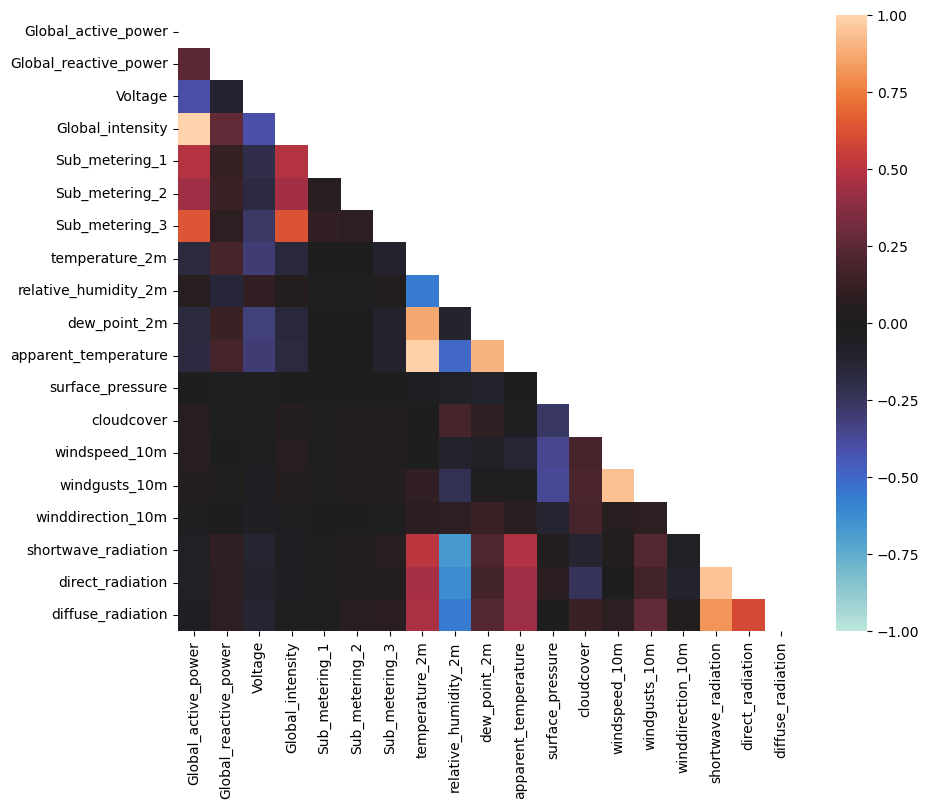

In [30]:
#We can try to visualize the correlation matrix with a mask to only show the lower triangle, which can make it easier to read.
mask = np.triu(np.ones_like(power_df_clean.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(power_df_clean.corr(numeric_only=True), annot=True, mask=mask, center=0, vmin=-1, vmax=1, fmt='.2f', annot_kws={'size': 10})

In [ ]:
# Lets look at the correlation of each feature with Global_active_power
power_df_clean.corr(numeric_only=True)['Global_active_power'].sort_values(ascending=False)

Global_active_power      1.000000
Global_intensity         0.998889
Sub_metering_3           0.638555
Sub_metering_1           0.484401
Sub_metering_2           0.434569
Global_reactive_power    0.247017
windspeed_10m            0.051084
relative_humidity_2m     0.049883
cloudcover               0.047185
windgusts_10m            0.044151
surface_pressure         0.002360
winddirection_10m       -0.030976
diffuse_radiation       -0.041187
direct_radiation        -0.056569
shortwave_radiation     -0.056681
temperature_2m          -0.160820
dew_point_2m            -0.161119
apparent_temperature    -0.169106
Voltage                 -0.399762
Name: Global_active_power, dtype: float64

 There are some features that have a strong positive correlation with Global_active_power, such as Global_intensity, Sub_meterin_3, Sub_metering_1, Sub_metering_2 and Global_reactive_power and negative correlation with Voltage, also from the weather API, it seems the features like dew_point_2m , temperature_2m and apparent_temperature are sort of the main features having some correlations with Global_active_power.These features may be useful for predicting Global_active_power in a machine learning model.

Lets take a look at the correlation matrix to see how the features are correlated with each other instead of the target vaiable  Global_active_power

In [27]:
X=power_df_clean.drop(columns='Global_active_power')
X.head()

Global_reactive_power  Voltage  Global_intensity  \
DateTime                                                                
2006-12-16 17:24:00                  0.418   234.84              18.4   
2006-12-16 17:25:00                  0.436   233.63              23.0   
2006-12-16 17:26:00                  0.498   233.29              23.0   
2006-12-16 17:27:00                  0.502   233.74              23.0   
2006-12-16 17:28:00                  0.528   235.68              15.8   

                     Sub_metering_1  Sub_metering_2  Sub_metering_3  \
DateTime                                                              
2006-12-16 17:24:00             0.0             1.0            17.0   
2006-12-16 17:25:00             0.0             1.0            16.0   
2006-12-16 17:26:00             0.0             2.0            17.0   
2006-12-16 17:27:00             0.0             1.0            17.0   
2006-12-16 17:28:00             0.0             1.0            17.0   

                     temperature_2m  relative_humidity_2m  dew_point_2m  \
DateTime                                                                  
2006-12-16 17:24:00           7.120                94.200         6.240   
2006-12-16 17:25:00           7.108                94.167         6.225   
2006-12-16 17:26:00           7.097                94.133         6.210   
2006-12-16 17:27:00           7.085                94.100         6.195   
2006-12-16 17:28:00           7.073                94.067         6.180   

                     apparent_temperature  surface_pressure  cloudcover  \
DateTime                                                                  
2006-12-16 17:24:00                 4.100          1012.400       100.0   
2006-12-16 17:25:00                 4.092          1012.417       100.0   
2006-12-16 17:26:00                 4.083          1012.433       100.0   
2006-12-16 17:27:00                 4.075          1012.450       100.0   
2006-12-16 17:28:00                 4.067          1012.467       100.0   

                     windspeed_10m  windgusts_10m  winddirection_10m  \
DateTime                                                               
2006-12-16 17:24:00         14.280         31.100            329.400   
2006-12-16 17:25:00         14.242         31.075            329.417   
2006-12-16 17:26:00         14.203         31.050            329.433   
2006-12-16 17:27:00         14.165         31.025            329.450   
2006-12-16 17:28:00         14.127         31.000            329.467   

                     shortwave_radiation  direct_radiation  diffuse_radiation  
DateTime                                                                       
2006-12-16 17:24:00                8.000               0.0              8.000  
2006-12-16 17:25:00                7.833               0.0              7.833  
2006-12-16 17:26:00                7.667               0.0              7.667  
2006-12-16 17:27:00                7.500               0.0              7.500  
2006-12-16 17:28:00                7.333               0.0              7.333

In [ ]:
corr_df = X.corr()

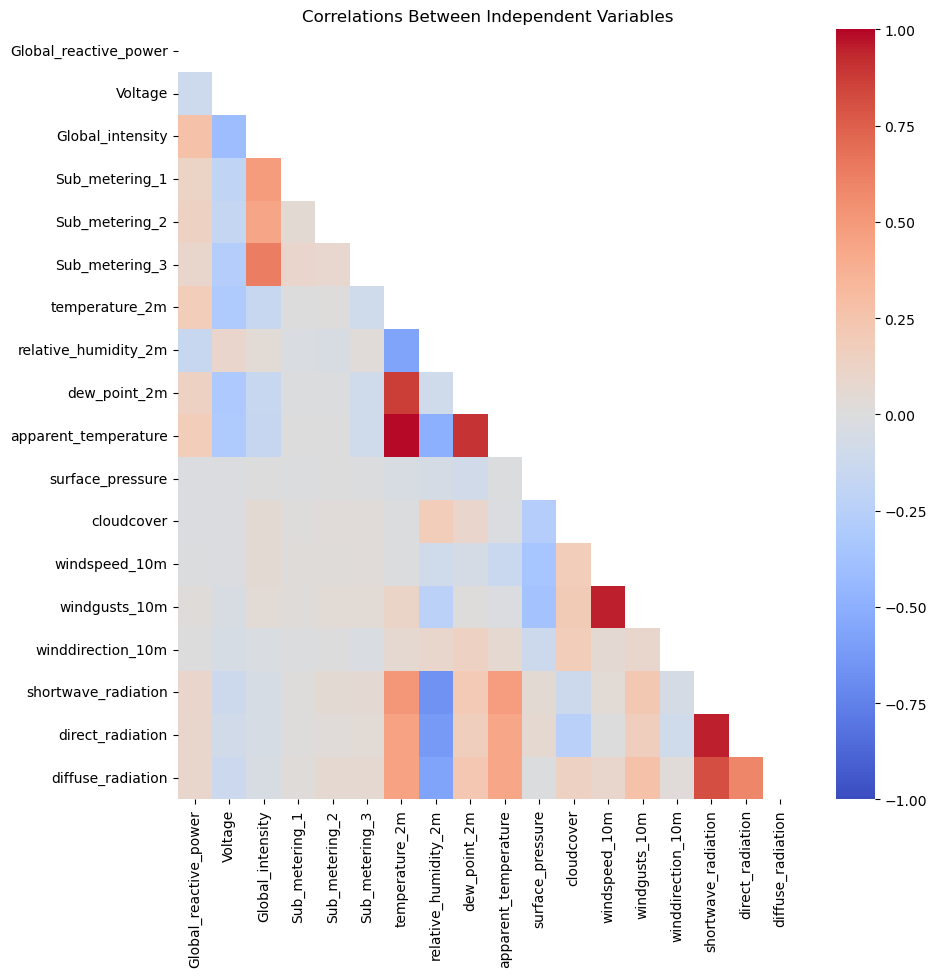

In [33]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr_df.round(2), 
    annot=True, 
    vmax=1, 
    vmin=-1, 
    center=0, 
    cmap="coolwarm", 
    mask=mask
)

plt.title("Correlations Between Independent Variables")
plt.show()


From the Correlation matrix for independednt variables we can, find the following interpretations


| **Correlation Type** | **Variables Involved** | **Relationship Explanation** |
|----------------------|----------------------|-----------------------------|
| 🔴 **Strong Positive** | **Global Intensity ↔ Global Reactive Power** | More electrical intensity leads to higher power consumption. |
| 🔴 **Strong Positive** | **Temperature ↔ Apparent Temperature** | Apparent temperature closely follows actual temperature, adjusted for humidity/wind. |
| 🔴 **Strong Positive** | **Shortwave Radiation ↔ Direct Radiation** | More incoming solar radiation increases direct radiation, affecting solar energy production. |
| 🔵 **Strong Negative** | **Voltage ↔ Global Reactive Power** | As voltage drops, power consumption often increases, a typical behavior in energy management. |
| 🔵 **Strong Negative** | **Relative Humidity ↔ Temperature** | Higher temperatures reduce relative humidity, as warm air holds more moisture. |
| 🔵 **Strong Negative** | **Wind Gusts ↔ Wind Speed** | Gusts represent temporary bursts, sometimes negatively correlated with steady wind speeds. |

It would make sense to drop some of these highly positve and negative correlations features from our dataset to avoid multicollinearity issues in our model, in the preprocessing notebook in future.

Since, we are looking this data set through the lens of energy usage over time, its best to see what trends we can observe when we plot our dataset fetures over time.

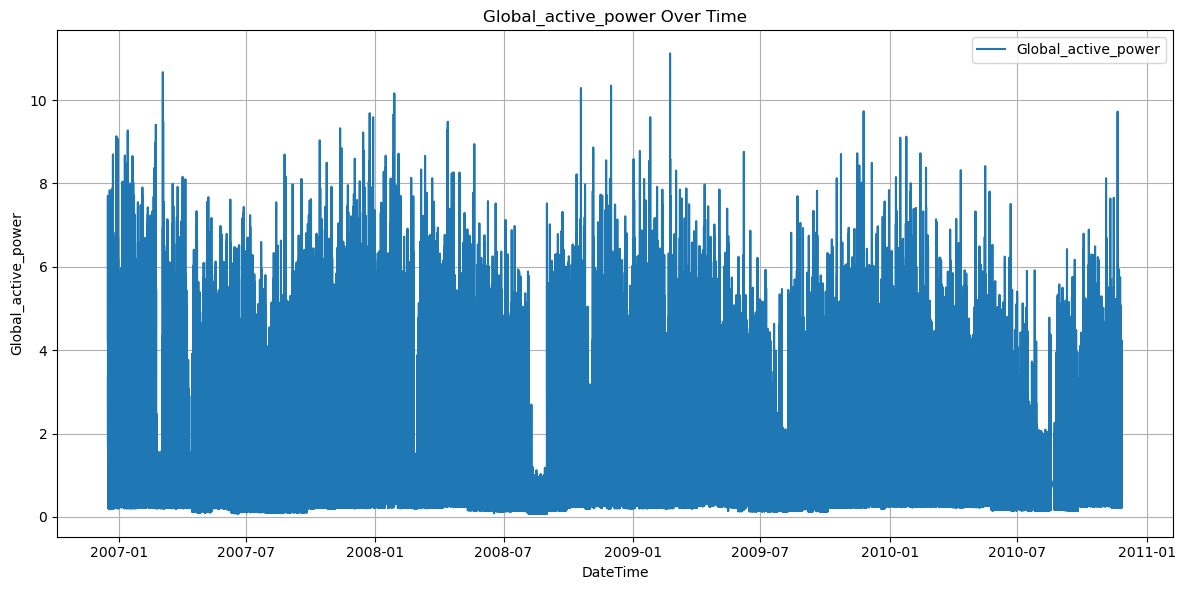

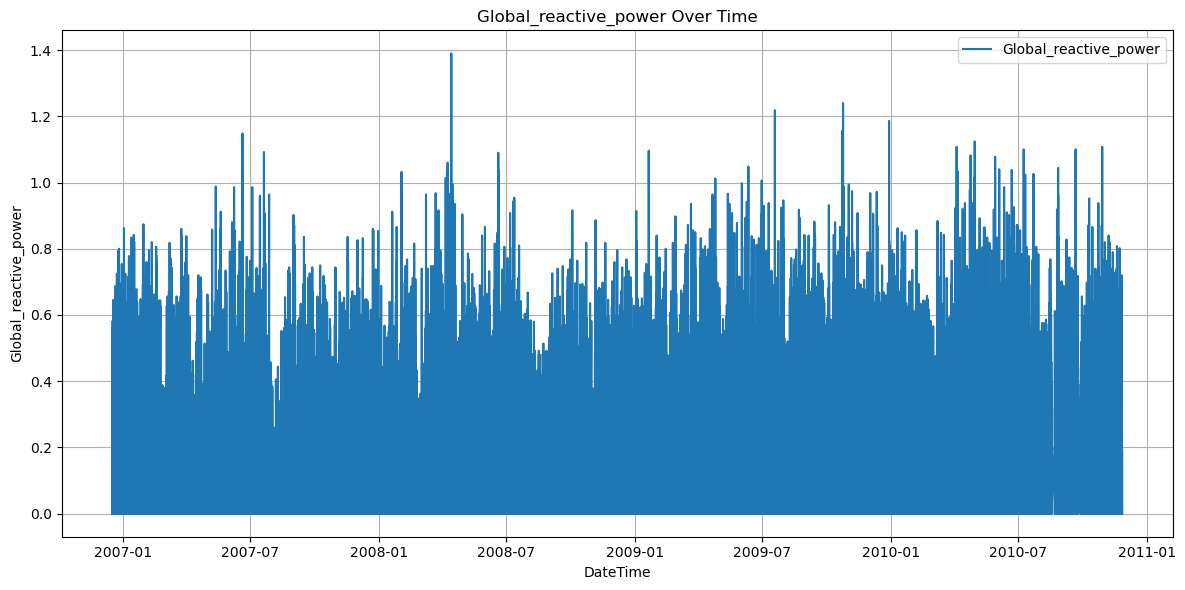

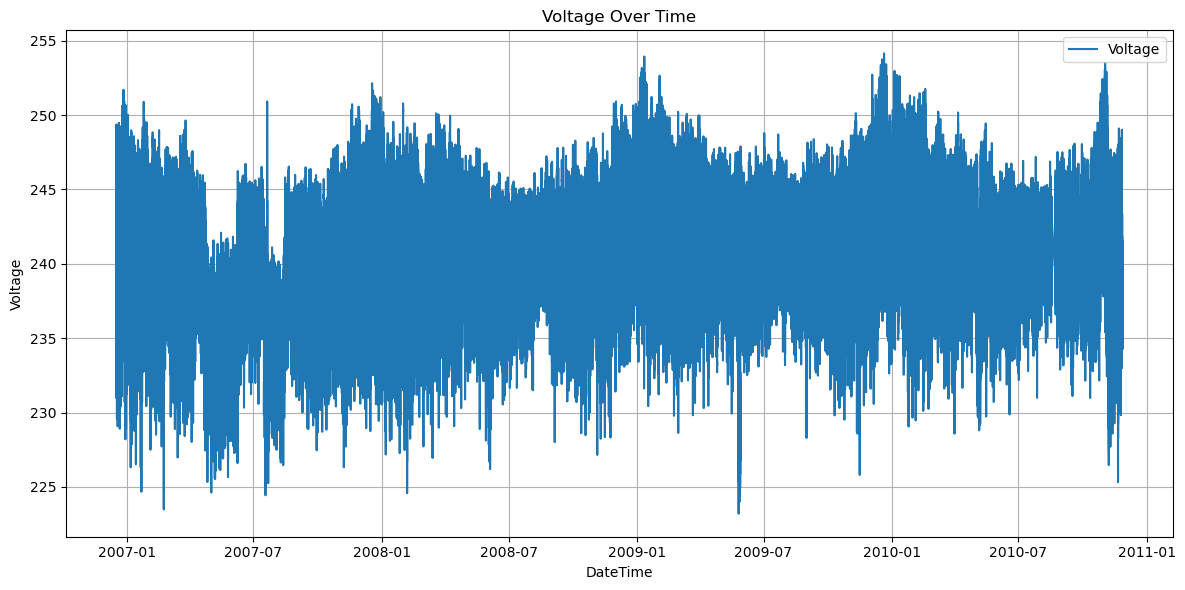

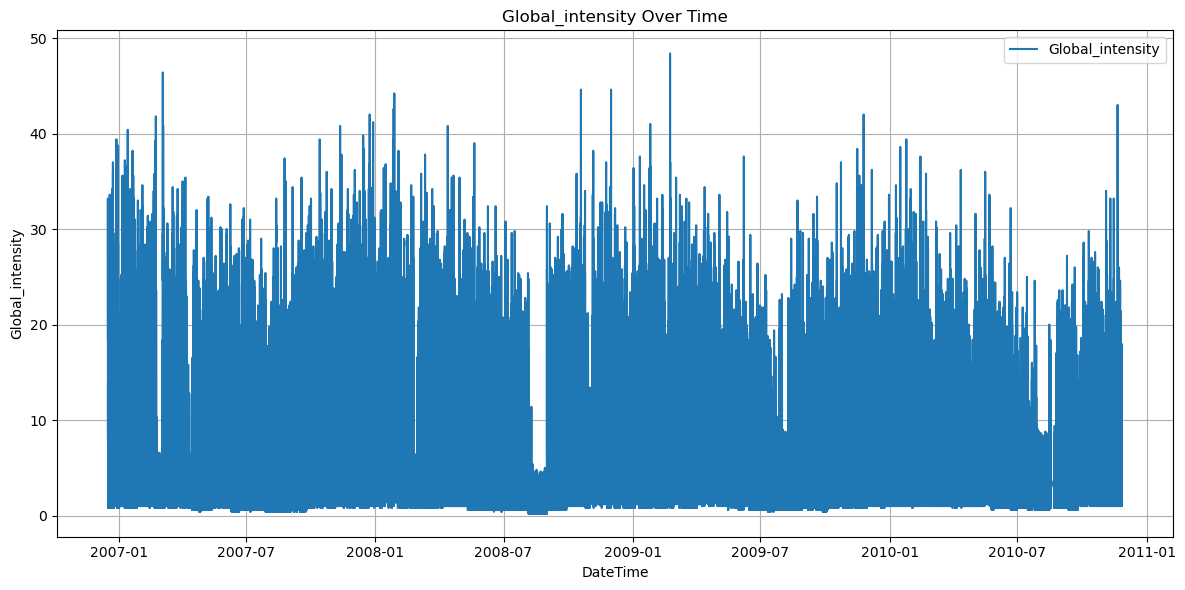

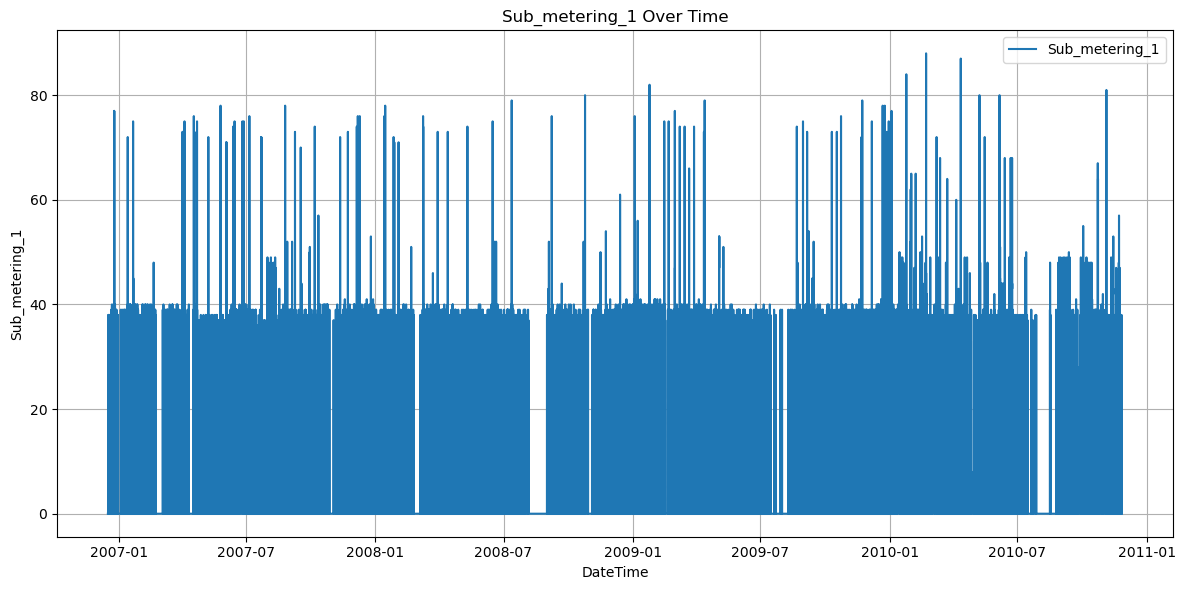

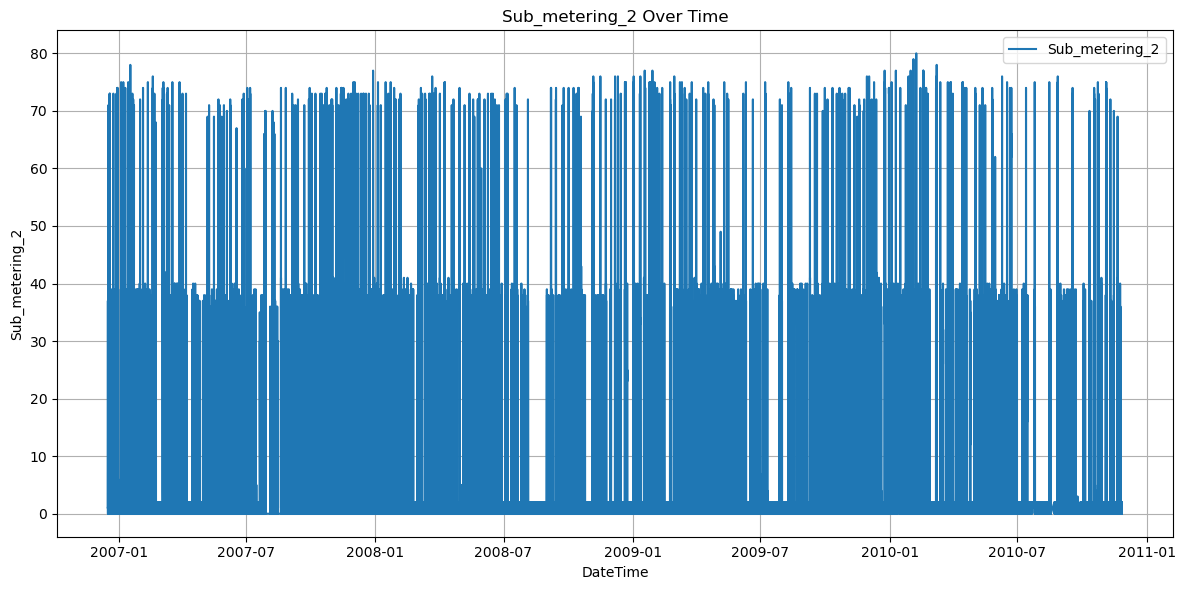

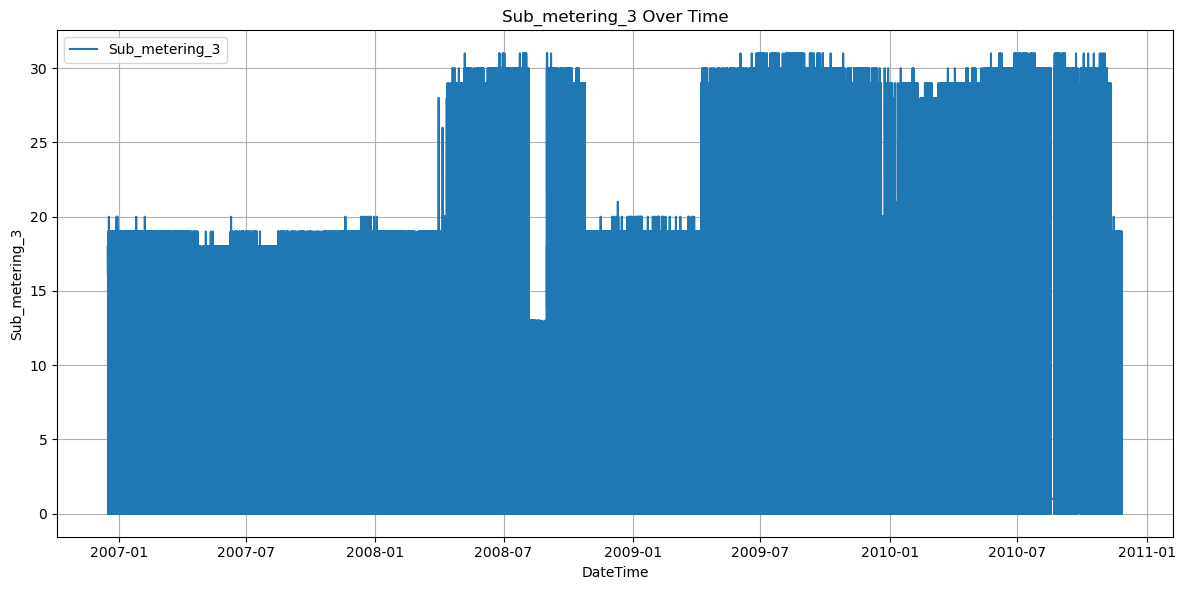

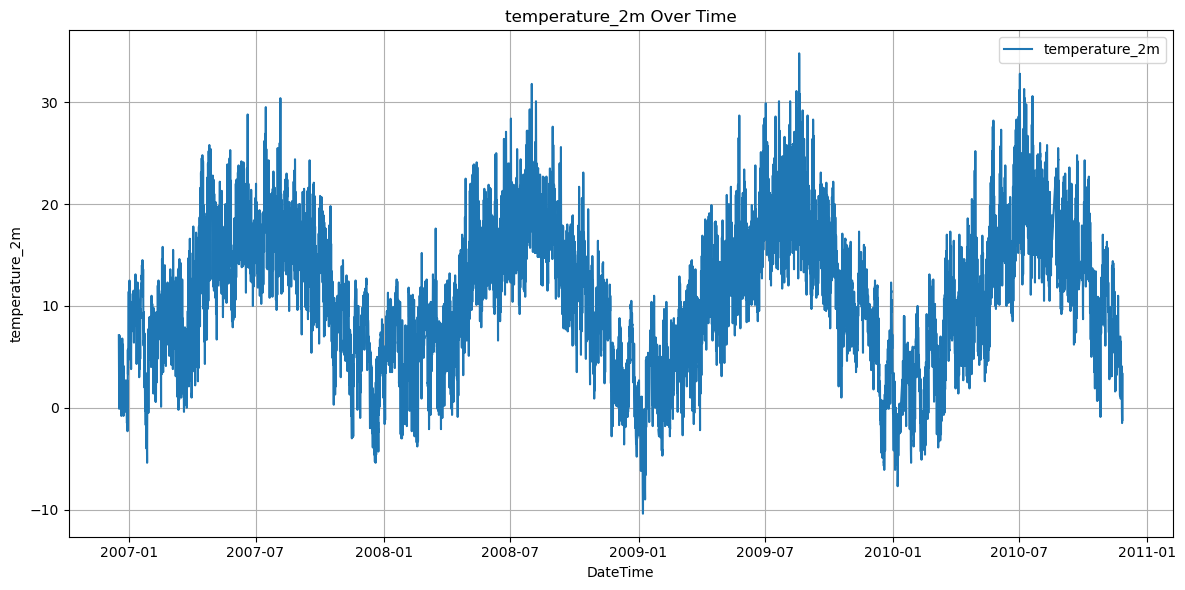

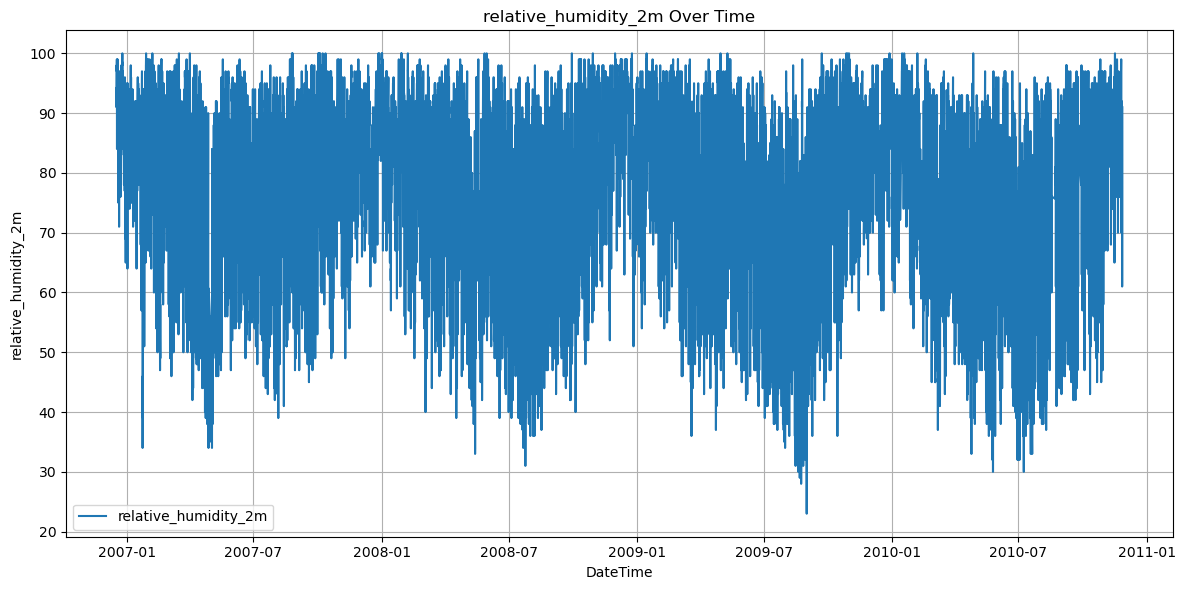

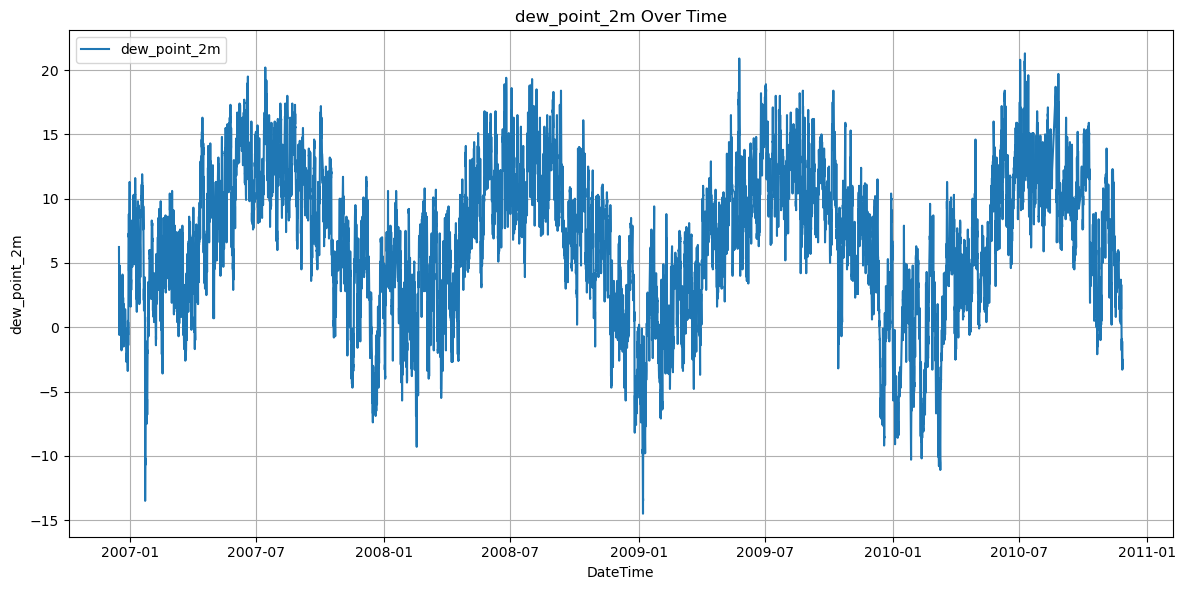

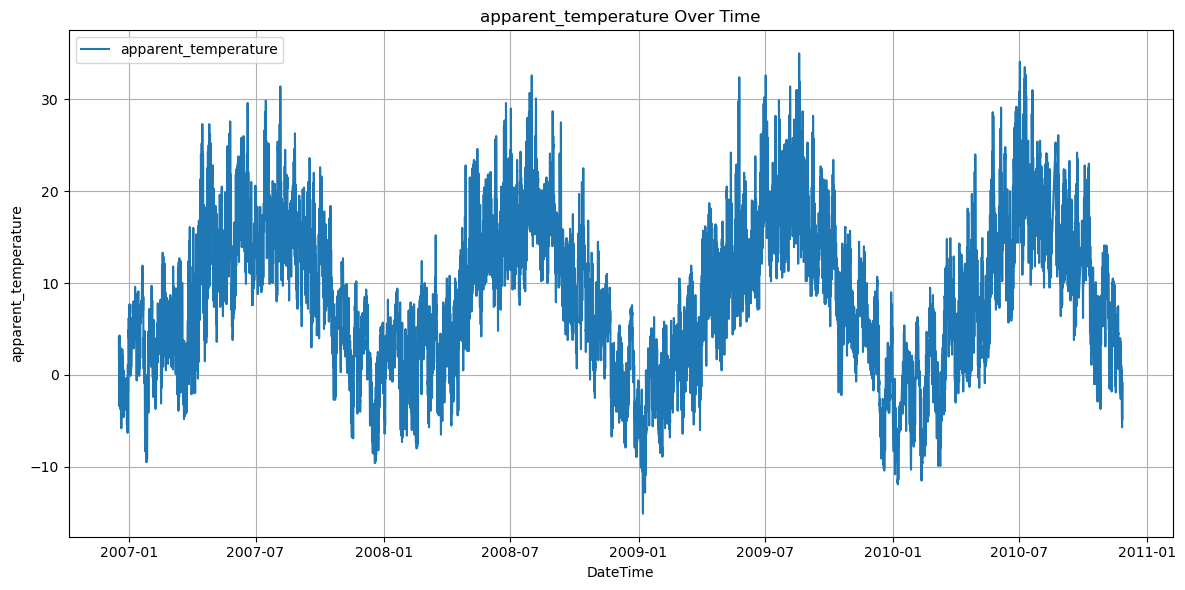

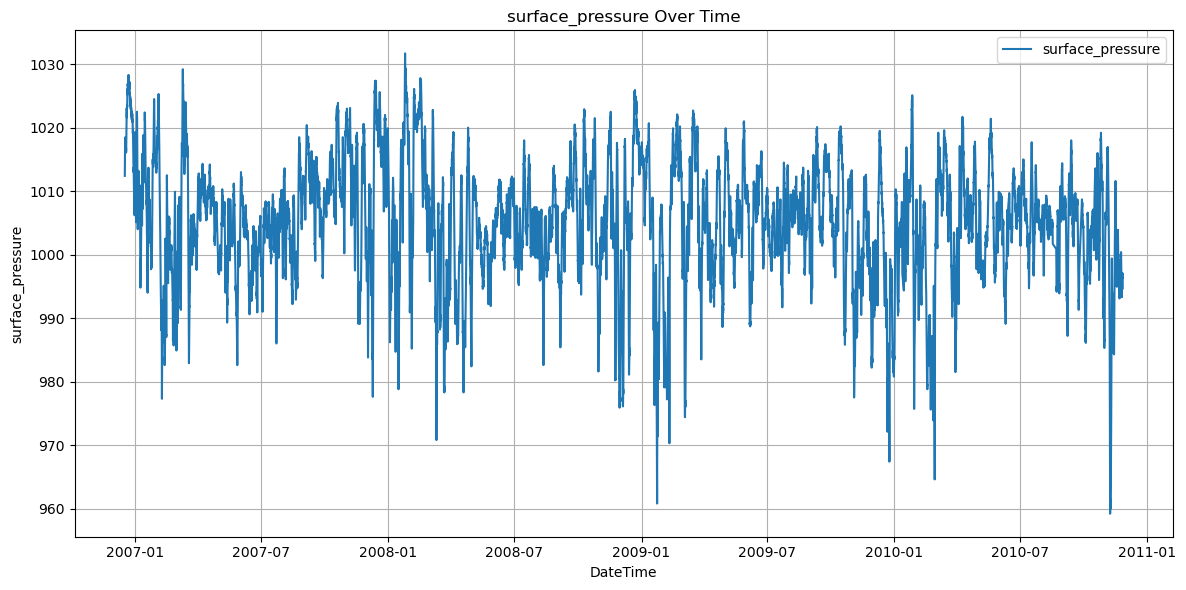

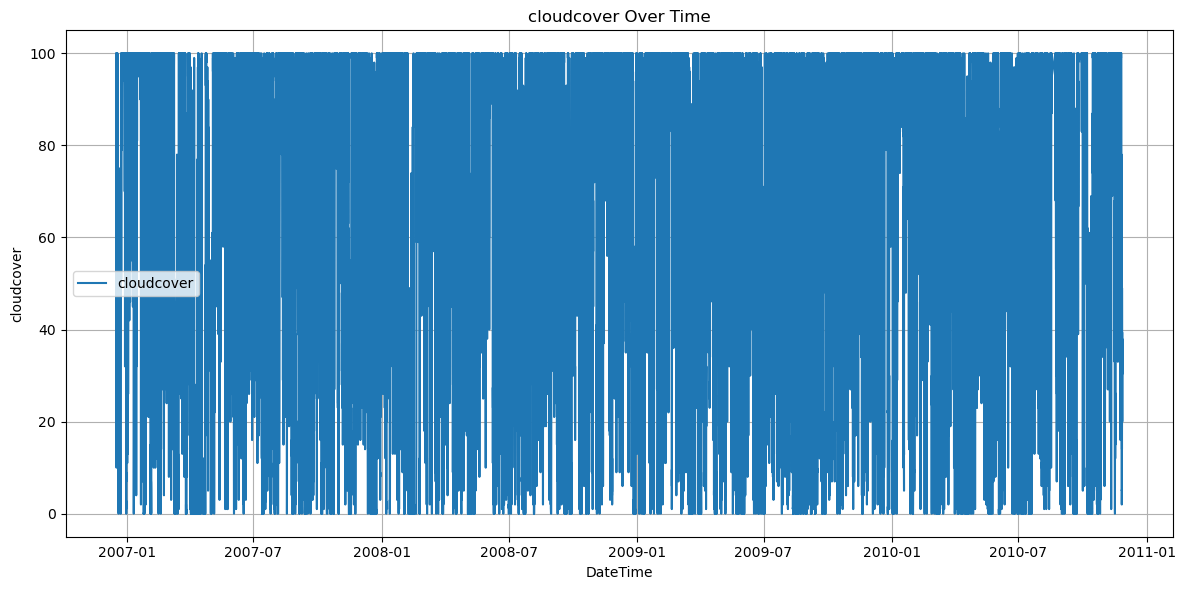

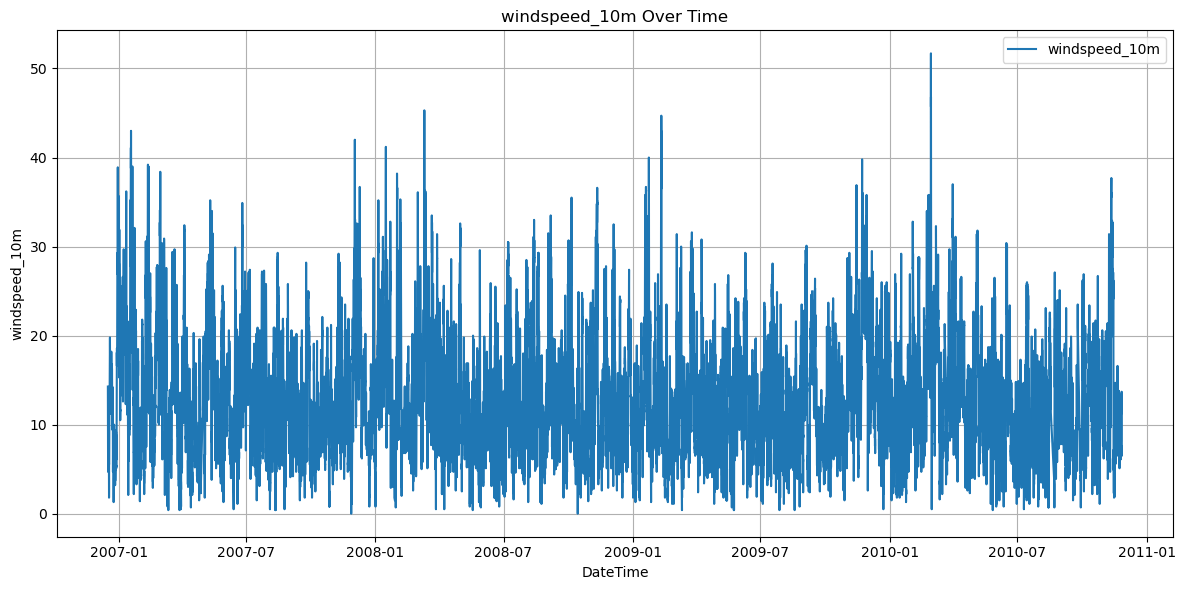

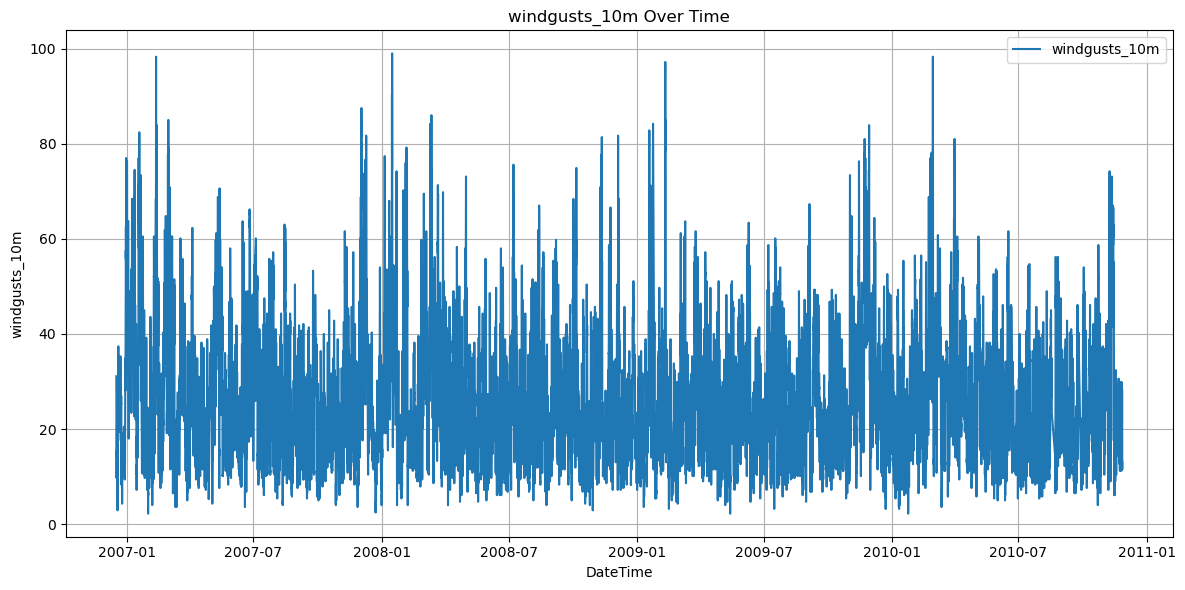

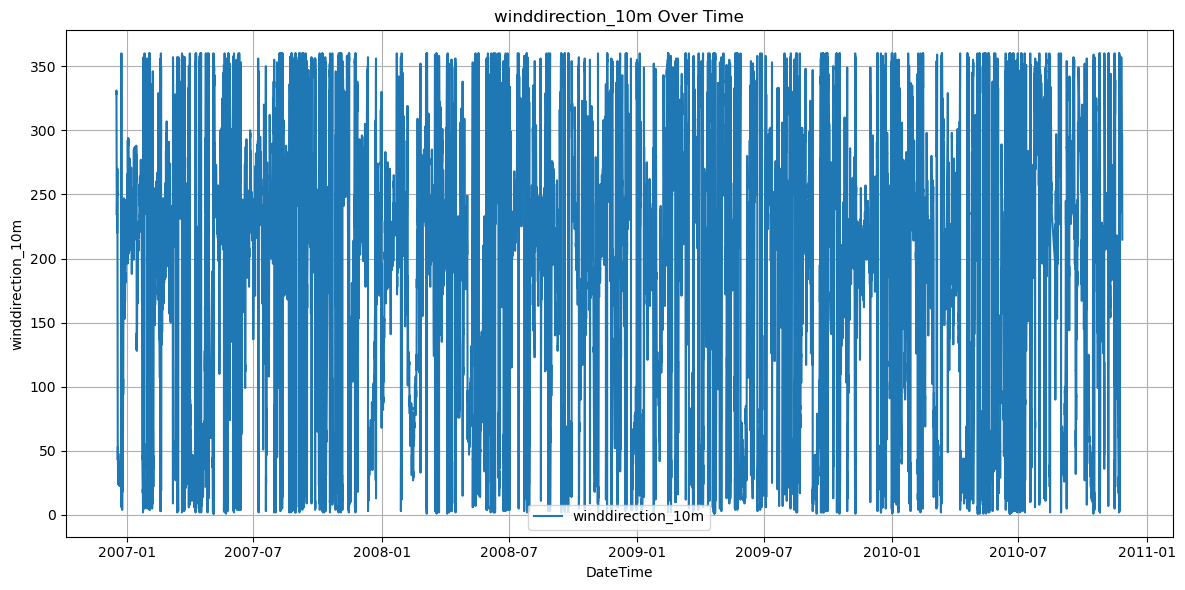

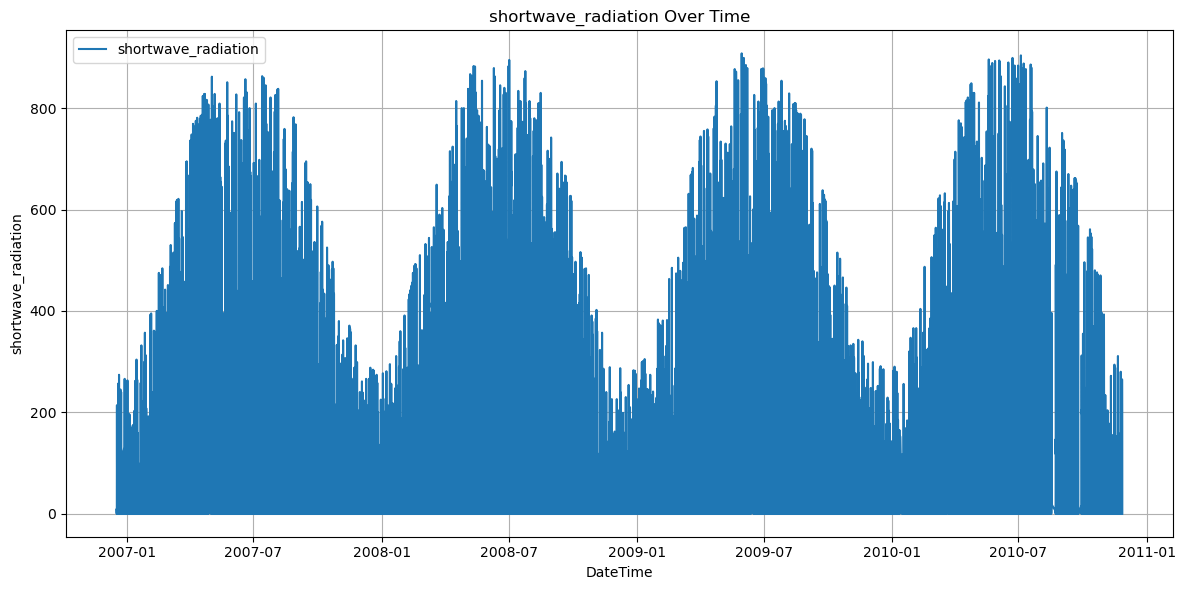

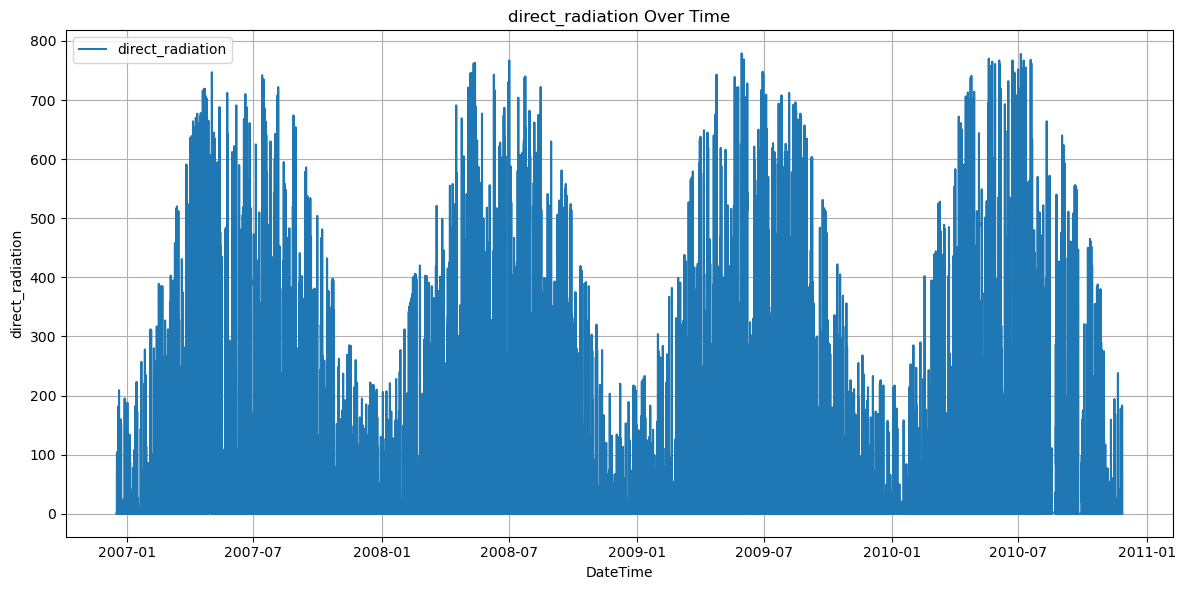

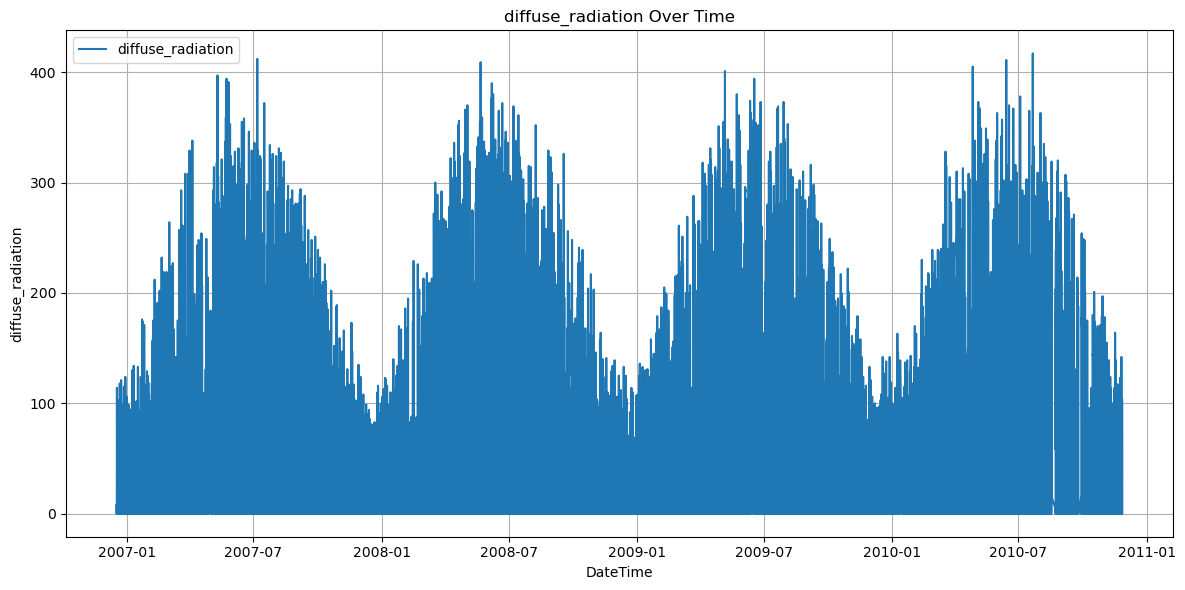

In [34]:
#Lets plot the time series data for each of the features
for col in power_df_clean.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(power_df_clean.index, power_df_clean[col], label=col)
    plt.title(f'{col} Over Time')
    plt.xlabel('DateTime')
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

Through the above plots we can visualize that there is a lot of noise in this time series data in our upcoming preprocessing step we might need to  consider some smoothening. E.g moving averages
Also, we can see that the data is not stationary, and there are trends and seasonality in the data, this will also be looked at in the preproceesing and feature engineering steps in future

# Next Steps: Pre-Processing <a class="anchor" id="eda"></a>
---

**Data processing**: Need to make sure the data is smoother

**Feature engineering**: Selecting the valuable fetures from the dataset and dropping some of the unrelated features from weather data, along with creating some features to make the modelling steps much easier
